# The Plan

## this workflow
Based on version 2 & 3 of this tree, I aim to made some improvements:
1. Reduce amount of species in the tree
2. Check species in the tree with literature on the 2ogd family
3. Replace guide sequences with Erbil's new set
4. Add more Azolla sequences to place in the tree
~~5. Plot RNAseq on the tree.~~
6. Add an outgroup

This latter improvement didn't work out well. 
Human and Yeast 2OGD sequences ended up all over the tree in saturated branches..


## data
Working with the data of version 4, minus the human and yeast sequences

In [2]:
grep '>' -c data/orthogroup_AtLDOX_AT4g22880_selection-v*_guide-v*.fasta

data/orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v1.fasta:4301
data/orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v2.fasta:4364
data/orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v3.fasta:4372
data/orthogroup_AtLDOX_AT4g22880_selection-v1_selection-v1_guide-v3.fasta:119


: 1

Instead I removed some very short sequences during trimming.
This is not my preferred method, so I want to be more stringent here from the onset.

In [3]:
grep '>' -c data/alignments_trimmed/orthogroup_AtLDOX_AT4g22880_*-iqtree-content.fasta

data/alignments_trimmed/orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v2_aligned-mafft_trim-gt4-seq95-res92_seqrm-iqtree-content.fasta:3927
data/alignments_trimmed/orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v3_aligned-mafft_trim-gt4-iqtree-content.fasta:4113


: 1

Now let's look at the species IDs that are in this set (taken from workflow v2)

In [5]:
wc -l data/1kP_ids_v1.txt
cat   data/1kP_ids_v1.txt

86 data/1kP_ids_v1.txt
>AALA04h
>ABSS
>AKXB
>ALVQ
>BMJR
>BNCU
>BSNI
>CAPN
>CBAE
>CQPW
>CVEG
>EEMJ
>ENQF
>EWXK
>GAON
>GJPF
>GNQG
>GOWD
>GTHK
>GXBM
>HPXA
>HVBQ
>JKHA
>JVBR
>JVSZ
>KBXS
>MEKP
>MUNP
>OSHQ
>PBUU
>PIVW
>PNZO
>POOW
>PQED
>PQTO
>QVMR
>RCBT
>RSOF
>SGTW
>TCBC
>TFYI
>THEW
>TOXE
>UGNK
>UHLI
>UKUC
>UPMJ
>UUHD
>VDAO
>VIBO
>VITX
>WBOD
>WLIC
>WZFE
>XZUY
>YJJY
>YWNF
>ZFGK
>ZFRE
>ZXJO
>ZZOL
>Ambtr
>Aquco
>Arath
>Betvu
>Carpa
>Chlre
>Chlva
>Elagu
>Klefl
>Manes
>Micpu
>Mimgu
>Musac
>Nelnu
>Orysa
>Phavu
>Pinta
>Poptr
>Prupe
>Selmo
>Solly
>Sorbi
>Spipo
>Theca
>Vitvi


: 1

In Kasai et al [DOI](https://doi.org/10.1111/tpj.12479), six plant genomes are studied for 2ogd gens:
1. *Arabidopsis thaliana* (present in dataset)
2. *Oryza sativa* (present in dataset)
3. *Picea abies* (**absent**, if I remember correctly, Pinus taeda behaved better in previous trees.)
4. *Selageniella moellendorfii* (present in dataset)
5. Physcomitrella patens (**absent**)
6. Chlamydomonas reinhartii (present in dataset)

Of these we miss only two. Picea is not present in my dataset but Physcomytrella is.
I'll add physcometrella (code Phypha)
Whether I'll go and hunt down all Picea sequences, I'll decide when I checked the RNAseq data for the presence of the different lineages.

In [1]:
grep -i Physcomitrella data/orthogroup_ANS-LDOX.fasta | head
grep -i Picea data/orthogroup_ANS-LDOX.fasta | head

>Phypa_v3_0-Phpat_006G019800_1-Physcomitrella_patens_VvANS-like
>Phypa_v3_0-Phpat_005G086800_1-Physcomitrella_patens_VvANS-like
>Phypa_v3_0-Phpat_013G033700_1-Physcomitrella_patens_VvANS-like
>Phypa_v3_0-Phpat_026G051300_1-Physcomitrella_patens_VvANS-like
>Phypa_v3_0-Phpat_009G093300_1-Physcomitrella_patens_VvANS-like
>Phypa_v3_0-Phpat_017G023600_1-Physcomitrella_patens_VvANS-like
>Phypa_v3_0-Phpat_003G127600_1-Physcomitrella_patens_VvANS-like
>Phypa_v3_0-Phpat_025G044200_1-Physcomitrella_patens_VvANS-like
>Phypa_v3_0-Phpat_025G017400_1-Physcomitrella_patens_VvANS-like
>Phypa_v3_0-Phpat_027G021000_1-Physcomitrella_patens_VvANS-like
grep: write error: Broken pipe
>AWQB-2009263-Picea_engelmanii_VvANS-like
>AWQB-2001692-Picea_engelmanii_VvANS-like
>AWQB-2002242-Picea_engelmanii_VvANS-like
>AWQB-2010257-Picea_engelmanii_VvANS-like
>AWQB-2002243-Picea_engelmanii_VvANS-like
>AWQB-2047197-Picea_engelmanii_VvANS-like
>AWQB-2052945-Picea_engelmanii_VvANS-like
>AWQB-2009200-Picea_engelmanii_VvAN

: 1

In [2]:
grep -i Physcomitrella data/orthogroup_ANS-LDOX.fasta | cut -c 1-5 | uniq -c
grep -i Picea data/orthogroup_ANS-LDOX.fasta | cut -c 1-5 | uniq -c

    100 >Phyp
     33 >AWQB04l
      1 NGVTG
     47 >AWQB
      1 NGVTG
      6 >AWQB


: 1

## Previous trees

Selection 1 guide 1 contained too few guide sequences, hence the first real result is selelection-v1_guide-v2.
This tree contains some characterised (guide) sequences for most clades, but not all.
A "rootable clade" can be identified with the vast majority of algal sequences, but this contains seed plant sequences as well.
This particular clade is consistent in all trees made.
However, when adding a human/yeast outgroup, these sequences ended up all over the tree.
This may be an artifact, but it reduced my confidence in the algal outgroup.

In [3]:
ls data

1kp-IDs_to_clade_to_colour.tab
1kP_ids_v1.txt
1kP_ids_v2.txt
1kP_LAR_selectionv1_guide_v5.fasta
alignments_raw
alignments_trimmed
ANS-likes_Azolla-filiculoides.fasta
ANS-likes_Azolla-filiculoides_v2.fasta
ANS-likes_Azolla-filiculoides_v2_linear.fasta
ANS-likes_Azolla-filiculoides_v3.fasta
ANS-likes_Azolla-filiculoides_v3_linear.fasta
guide-sequences-v1.fasta
guide-sequences-v1_linear.fasta
guide-sequences-v2.fasta
guide-sequences-v2_linear.fasta
guide-sequences-v3.fasta
guide-sequences-v3_linear.fasta
orthogroup_ANS-LDOX.fasta
orthogroup_AtLDOX_AT4g22880.fasta
orthogroup_AtLDOX_AT4g22880_linear.fasta
orthogroup_AtLDOX_AT4g22880_selection-v1.fasta
orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v1.fasta
orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v2.fasta
orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v3.fasta
orthogroup_AtLDOX_AT4g22880_selection-v1_selection-v1_guide-v3.fasta
orthogroup_AtLDOX_AT4g22880_selection-v2.fasta
orthogroup_VvANS.fasta
_selection-v2.fasta
Sorghum-subset-LDO

: 1

# 1. Composing your fasta
Mostly the same as version4, except for leaving out the outgroup of human and yeast sequences.

Let's look at what we have

In [2]:
tree

.
├── 2OGD_tree_v4.ipynb
├── analyses
│   ├── orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v1_fasttrees
│   │   └── aligned-mafft_trim-gt4-seq95-res90
│   │       ├── orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v1_aligned-mafft_trim-gt4-seq95-res90_iqtree-fast.bionj
│   │       ├── orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v1_aligned-mafft_trim-gt4-seq95-res90_iqtree-fast.ckp.gz
│   │       ├── orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v1_aligned-mafft_trim-gt4-seq95-res90_iqtree-fast.iqtree
│   │       ├── orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v1_aligned-mafft_trim-gt4-seq95-res90_iqtree-fast.log
│   │       ├── orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v1_aligned-mafft_trim-gt4-seq95-res90_iqtree-fast.mldist
│   │       ├── orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v1_aligned-mafft_trim-gt4-seq95-res90_iqtree-fast.stderr
│   │       ├── orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v1_aligned-mafft_trim-gt4-seq95-res90_iqtree-fast.stdout
│   │      

│   ├── alignments_raw
│   │   ├── orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v1_aligned-mafft.fasta
│   │   ├── orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v1_aligned-mafft.log
│   │   ├── orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v2_aligned-mafft-einsi.fasta
│   │   ├── orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v2_aligned-mafft-einsi.log
│   │   ├── orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v2_aligned-mafft.fasta
│   │   ├── orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v2_aligned-mafft.log
│   │   ├── orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v3_aligned-mafft.fasta
│   │   ├── orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v3_aligned-mafft-linsi.fasta
│   │   ├── orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v3_aligned-mafft-linsi.log
│   │   └── orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v3_aligned-mafft.log
│   ├── alignments_trimmed
│   │   ├── orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v1_aligned-mafft_trim-gt4-seq90-res90.fasta
│   │   ├── o

: 1

Store the sequences you want to make a tree of in the data directory and make the inseq variable the name of your input fasta without the extention:

In [1]:
inseq=orthogroup_AtLDOX_AT4g22880

In [12]:
while read line
do   count=$(grep "$line" -c data/orthogroup_AtLDOX_AT4g22880_linear.fasta )
     echo -e "$line\t$count"
done < data/1kP_ids_v1.txt 
echo 'Phypa' && grep '>Phypa' -c data/orthogroup_AtLDOX_AT4g22880_linear.fasta

>AALA	43
>ABSS	41
>AKXB	21
>ALVQ	43
>BMJR	28
>BNCU	52
>BSNI	28
>CAPN	27
>CBAE	65
>CQPW	42
>CVEG	26
>EEMJ	28
>ENQF	54
>EWXK	53
>GAON	54
>GJPF	47
>GNQG	48
>GOWD	25
>GTHK	37
>GXBM	3
>HPXA	50
>HVBQ	70
>JKHA	5
>JVBR	43
>JVSZ	31
>KBXS	40
>MEKP	55
>MUNP	29
>OSHQ	42
>PBUU	32
>PIVW	29
>PNZO	40
>POOW	7
>PQED	8
>PQTO	54
>QVMR	22
>RCBT	38
>RSOF	1
>SGTW	34
>TCBC	23
>TFYI	26
>THEW	19
>TOXE	29
>UGNK	56
>UHLI	33
>UKUC	9
>UPMJ	56
>UUHD	36
>VDAO	25
>VIBO	52
>VITX	39
>WBOD	60
>WLIC	39
>WZFE	41
>XZUY	32
>YJJY	30
>YWNF	31
>ZFGK	43
>ZFRE	46
>ZXJO	31
>ZZOL	35
>Ambtr	91
>Aquco	92
>Arath	87
>Betvu	96
>Carpa	63
>Chlre	2
>Chlva	5
>Elagu	45
>Klefl	4
>Manes	128
>Micpu	9
>Mimgu	86
>Musac	86
>Nelnu	79
>Orysa	86
>Phavu	106
>Pinta	164
>Poptr	131
>Prupe	118
>Selmo	69
>Solly	150
>Sorbi	93
>Spipo	36
>Theca	105
>Vitvi	136
Phypa04h
50


: 1

Based on the list above, I made a pivot table to see how these specied identifiers spread over the different clades of land plants.
Since the original input of 4000+ (without Azfi or guide seqs) is too big, I want to be more stringent on input.
Simultaneously, this is just huuuge gene family, so the tree is going to be huge anyway.

The sheet is available online here: https://docs.google.com/spreadsheets/d/1v2igxY_nr7ETMoUdbqpY0QKVxJ-KYiRiO2lLoyOABsw/edit?usp=sharing

The summary looks like this:
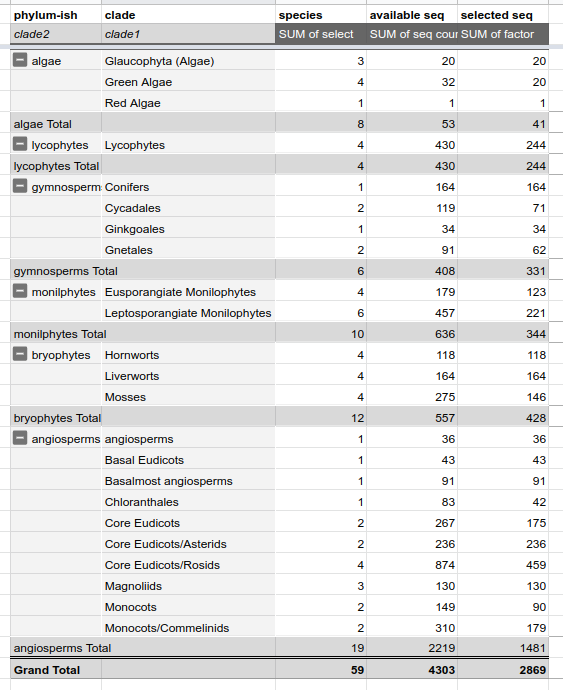

In short, by removing some species from all major clades (but especially angiosperms) I moved from 4303 sequences to 2869 while keeping a reasonable spread over plant phyla.

In selecting I prioritised keeping DNA samples in, and having at least one representative species per clade (clade1).

In total, 59h species are in this reference set.

## 1.2 systematic subsetting.


based on the sheet linked above, I made a new file 1kp_ids_v2.txt.
This file contains all RNA and DNA identifiers from that sheet.

In [27]:
wc -l data/1kP_ids_v2.txt

59 data/1kP_ids_v2.txt


: 1

In [28]:
grep -i -f ./data/1kP_ids_v2.txt data/"$inseq"_linear.fasta -A 1 --no-group-separator > data/"$inseq"_selection-v2.fasta

: 1

In [29]:
grep '>'  data/"$inseq"_selection-v2.fasta -c
wc -l     data/"$inseq"_selection-v2.fasta

2869004l
5738 data/orthogroup_AtLDOX_AT4g22880_selection-v2.fasta


: 1

Now check if all species IDs are present:

In [30]:
while read line
do   count=$(grep "$line" -c  data/"$inseq"_selection-v2.fasta )
     echo -e "$line\t$count"
done < data/1kP_ids_v2.txt 


>AALA	43
>ABSS	41
>AKXB	21
>ALVQ	43
>BMJR	28
>BNCU	52
>BSNI	28
>CAPN	27
>CBAE	65
>CVEG	26
>ENQF	54
>GJPF	47
>GOWD	25
>GTHK	37
>HPXA	50
>JKHA	5
>JVBR	43
>JVSZ	31
>MEKP	55
>MUNP	29
>OSHQ	42
>PIVW	29
>POOW	7
>PQED	8
>QVMR	22
>RCBT	38
>RSOF	1
>SGTW	34
>TCBC	23
>TFYI	26
>UHLI	33
>UPMJ	56
>UUHD	36
>VDAO	25
>VIBO	52
>WBOD	60
>WLIC	39
>XZUY	32
>ZFRE	46
>ZXJO	31
>Ambtr	91
>Arath	87
>Betvu	96
>Chlre	2
>Chlva	5
>Klefl	4
>Micpu	9
>Mimgu	86
>Nelnu	79
>Orysa	86
>Pinta	164
>Poptr	131
>Selmo	69
>Solly	150
>Sorbi	93
>Spipo	36
>Theca	105
>Vitvi	136
>Phypa	50


: 1

### concluding
Great, we have a succesfully reduced the input by 1500-ish sequences and double checked that all species IDs came across as intended. Now move on the adding guide and Azolla sequences.

## 1.3 add guide sequences

### now actually working on the guide sequences:
linearise:

In [34]:
cat data/guide-sequences-v4.fasta \
  | awk '/^>/ {printf("%s%s\n",(N>0?"\n":""),$0);N++;next;} {printf("%s",$0);} END {printf("\n");}' \
  > data/guide-sequences-v4_linear.fasta

: 1

And the Azolla filiculoides sequences:

In [50]:
cat data/ANS-likes_Azolla-filiculoides_v4.fasta \
  | awk '/^>/ {printf("%s%s\n",(N>0?"\n":""),$0);N++;next;} {printf("%s",$0);} END {printf("\n");}' \
  > data/ANS-likes_Azolla-filiculoides_v4_linear.fasta

: 1

now combine

1. outgroup yeast
2. outgroup human
3. Azfi sequences
4. guide sequences
5. orthogroup

In [2]:
cat data/ANS-likes_Azolla-filiculoides_v4_linear.fasta \
    data/guide-sequences-v4_linear.fasta               \
    data/"$inseq"_selection-v2.fasta                   \
> data/"$inseq"_selection-v2_guide-v5.fasta

In [3]:
head data/"$inseq"_selection-v2_guide-v5.fasta
tail data/"$inseq"_selection-v2_guide-v5.fasta

>Azfi_s0092.g043107
MADTCTPTTTLVATSNTKIQSIKELVDAGLCHVPSIYIRPPNERPNFQLDVNSTVECENIPIISFANMFGHNREHIVEQVRHACLDWGVFQVTNHCVPTDVVTKIWTVTSEFFALPTSEKVSFNSNDPSFPMYFFTGFYRDERIREWKDTLGFKPSSITDTNLIPTFLRDPMLNFYTDTKNLAHLVGELVALSLGIDTTVLHKHFSRQTIGMNYYPTCPQPDLAFGLSSHSDFGSITLLMQDAEGLQVKKGDEWVNVKVIPNSFIVLIGDQLEILTNGHYKSVEHRVLTNTNKPRMSIGCFFGPHDSDKIGPIDKFISDDKPTVYKETMFGDYLKHGFGKELNGKSNLEFSIRRHTNVK
>Azfi_s0003.g007795
MDCTSEPLPPCLQELVDAGLSSVPSAYIRPPHERFIPPSHDLSSNAAQIPVINHGVPHDVMIEMRASCSRFFQQPPEMRNIYRSQSFDDPLAYSTSFNPAKEKANDWKDVLYVRDFPGNPVDGFGIAPDVCRFHLALFYAFLHFVYSTLGAFQVFRYEVARLAKQLYEAIFEGLGLSSICIEKTLPGIPWLAMCVNYYPRCPDPSITYGSTAHTDGGSLTILLQDDVAGLWIQKKNEWVQVKPLANSFVVNIGDQVEILSNGIYKSIKHTVLTNSERPRMSVACIFGPKEDENIAPIEDLVSEHQPARYKEVRFGDYLANVYNVELAKL
>Azfi_s0005.g009422
MSRAPAFGESGSSGSYFSETGSLLLMLSDNEAPSDRVGLLACLDSGFFYVVNHGIDRDLIQEVLHQSRKFFELPLSEKAKCLRNQNHRGYTPLFDETLDPSRQFQGDSKEGYYIGVEAPKDSHRASLCFYGPNIWPSEDLLPGWRDTMETYHKKTLNVASKICRLIALALNLEPEFFEKTGMMDNPMAFLRLLHYSGEKSIPEKGIFGAGAHSDWGFLTLIICDGTPGLQICRDKDEKSQLWESVEPVEG

In [4]:
grep '>' -c data/"$inseq"_selection-v2_guide-v5.fasta

3020


And reset variable, and check.

In [5]:
# for the selection workflow
inseq="$inseq"_selection-v2_guide-v5
echo $inseq

orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5


In [6]:
head data/$inseq.fasta

>Azfi_s0092.g043107
MADTCTPTTTLVATSNTKIQSIKELVDAGLCHVPSIYIRPPNERPNFQLDVNSTVECENIPIISFANMFGHNREHIVEQVRHACLDWGVFQVTNHCVPTDVVTKIWTVTSEFFALPTSEKVSFNSNDPSFPMYFFTGFYRDERIREWKDTLGFKPSSITDTNLIPTFLRDPMLNFYTDTKNLAHLVGELVALSLGIDTTVLHKHFSRQTIGMNYYPTCPQPDLAFGLSSHSDFGSITLLMQDAEGLQVKKGDEWVNVKVIPNSFIVLIGDQLEILTNGHYKSVEHRVLTNTNKPRMSIGCFFGPHDSDKIGPIDKFISDDKPTVYKETMFGDYLKHGFGKELNGKSNLEFSIRRHTNVK
>Azfi_s0003.g007795
MDCTSEPLPPCLQELVDAGLSSVPSAYIRPPHERFIPPSHDLSSNAAQIPVINHGVPHDVMIEMRASCSRFFQQPPEMRNIYRSQSFDDPLAYSTSFNPAKEKANDWKDVLYVRDFPGNPVDGFGIAPDVCRFHLALFYAFLHFVYSTLGAFQVFRYEVARLAKQLYEAIFEGLGLSSICIEKTLPGIPWLAMCVNYYPRCPDPSITYGSTAHTDGGSLTILLQDDVAGLWIQKKNEWVQVKPLANSFVVNIGDQVEILSNGIYKSIKHTVLTNSERPRMSVACIFGPKEDENIAPIEDLVSEHQPARYKEVRFGDYLANVYNVELAKL
>Azfi_s0005.g009422
MSRAPAFGESGSSGSYFSETGSLLLMLSDNEAPSDRVGLLACLDSGFFYVVNHGIDRDLIQEVLHQSRKFFELPLSEKAKCLRNQNHRGYTPLFDETLDPSRQFQGDSKEGYYIGVEAPKDSHRASLCFYGPNIWPSEDLLPGWRDTMETYHKKTLNVASKICRLIALALNLEPEFFEKTGMMDNPMAFLRLLHYSGEKSIPEKGIFGAGAHSDWGFLTLIICDGTPGLQICRDKDEKSQLWESVEPVEG

# 2. Aligning

Linsi is probably the most acurate mafft setting (as declared by the MAFFT authors). It is turned off by default in normal or auto mafft for alignments bigger than 200 sequences. 
However, reading the manual, einsi should be the better method, at least for gappy allignemnts or allignments with multiple domains.
In this particular case, these two are very similar but I like the einsi allignment a bit better in the gaps.
I assessed this on a big alligment of sel2-g4 with double guide sequences. 
I later removed these and started the process anew.
The "wrong" allignments are removed from the repo, and I'm not re-creating allignments that I actually won't use. 
Hence, here I'm only creating a mafft-einsi alligment. 
Some old alligments are retained in Git history.

In [7]:
inseq=orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5

In [ ]:
rm "./data/alignments_raw/$inseq"_aligned-mafft*
if    [ ! -d ./data/alignments_raw/ ]
then  mkdir  ./data/alignments_raw
fi
prefix=data/alignments_raw/"$inseq"_aligned-mafft-einsi
if    [ ! -f "$prefix".fasta ]
then  einsi --thread $(nproc) data/$inseq.fasta \
            >  "$prefix".fasta \
            2> "$prefix".log
fi

(phyla_ans) (phyla_ans) (phyla_ans) 

In [21]:
tail ./data/alignments_raw/"$inseq"_aligned-*.log

If unsure which option to use, try 'mafft --auto input > output'.
For more information, see 'mafft --help', 'mafft --man' and the mafft page.

The default gap scoring scheme has been changed in version 7.110 (2013 Oct).
It tends to insert more gaps into gap-rich regions than previous versions.
To disable this change, add the --leavegappyregion option.

Parameters for the E-INS-i option have been changed in version 7.243 (2015 Jun).
To switch to the old parameters, use --oldgenafpair, instead of --genafpair.

(phyla_ans) 

: 1

In [22]:
ls ./data/alignments_raw/$inseq* -sh

 27M ./data/alignments_raw/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5_aligned-mafft-einsi.fasta
3.6M ./data/alignments_raw/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5_aligned-mafft-einsi.log
(phyla_ans) 

: 1

In [23]:
head ./data/alignments_raw/"$inseq"_aligned-mafft*.fasta

>Azfi_s0092.g043107
------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------
--------------MADTCT------------------PTTTLVAT--------------
------------------------------------------------------------
------------------------------------------------------------
(phyla_ans) 

: 1

## snapshots of alignment
Done manually with a quick trim.

# 3. Alignment trimming

Odds are, your alignment is quite gappy which may confuse tree building algorithms. Often it is better to remove gappy columns in your alignment. Let's have a look at this with `trimAl`. Short for 'trim alignment' (I guess). No Artificial intelegence stuff going on here.

As always, have a look at the help page.

In [69]:
inseq=orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5

(phyla_ans) 

: 1

## 3.2 Tweak trimming parameters

Alternatively, you may tweak your own trimming parameters like so. 

Everytime I change parameters, I change the variable `$trimappendix` to reflect those changes. Second, I explain briefly in a text cell why I chose to do so.

In [4]:
trimal -h


trimAl v1.4.rev15 build[2013-12-17]. 2009-2013. Salvador Capella-Gutierrez and Toni Gabaldón.

trimAl webpage: http://trimal.cgenomics.org

This program is free software: you can redistribute it and/or modify 
it under the terms of the GNU General Public License as published by 
the Free Software Foundation, the last available version.

Please cite:
		trimAl: a tool for automated alignment trimming in large-scale phylogenetic analyses.
		Salvador Capella-Gutierrez; Jose M. Silla-Martinez; Toni Gabaldon.
		Bioinformatics 2009, 25:1972-1973.

Basic usage
	trimal -in <inputfile> -out <outputfile> -(other options).

Common options (for a complete list please see the User Guide or visit http://trimal.cgenomics.org):

    -h                       Print this information and show some examples.
    --version                Print the trimAl version.

    -in <inputfile>          Input file in several formats (clustal, fasta, NBRF/PIR, nexus, phylip3.2, phylip).

    -compareset <inputfile>  In


9) Selection of sequences to be deleted from the alignment. Start in 0

   trimal -in <inputfile> -out <outputfile> -selectseqs { 2,4,8-12 } 

10) Select the 5 most representative sequences from the alignment

   trimal -in <inputfile> -out <outputfile> -clusters 5 

(phyla_ans) 

: 1

#### gap threshold

This is a somewhat overdone parallel loop/function to run trimal with various settings and get some numbers out of it.

In [76]:
dir=data/alignments_trimmed
if    [ ! -d "$dir" ]
then  mkdir  "$dir"
fi
#rm $dir/allignment_dimensions.tab
#rm $dir/allignment_gap-freq.tab 
CPU=$(nproc)

# set arrays to itterate over
allignments=(data/alignments_raw/"$inseq"_aligned*einsi*.fasta)
gt=( 02 04 06 08 10 20 30 40 50 60 70 80 90 )
res=1 # kept for compatibility
seq=1 # kept for compatibility

# export trimAL function so parallel can find it
function trimAL {
  # actually run trimAL for this allignment and settings combo
  trimappendix=trim-gt"$2"
  echo $trimappendix
  appendix=$(echo $1 | cut -d '/' -f 3- | sed "s/$6\_//" | sed "s/.fasta//")
  out="$5"/"$6"_"$appendix"_"$trimappendix"
  if   [ ! -f "$out".fasta ]
  then trimal -in  $1           \
              -out "$out".fasta \
              -gt  .$2          \
              >  $out.std       \
              2> $out.err
  fi
  # this takes a lot of space: make a png snapshot of every allignment
  if    [ ! -f $prefix.png ]
  then  jalview -nodisplay       \
                -open $out.fasta \
                -colour CLUSTAL  \
                -png  $out.png > /dev/null 2> /dev/null 
  fi

  # determine the allignment width and length for each allignment
  if   [ -f "$out".fasta ]
  then width=$(head -n 100 "$out".fasta                                                                     \
               | awk '/^>/ {printf("%s%s\n",(N>0?"\n":""),$0);N++;next;} {printf($0);} END {printf("\n");}' \
               | head -n 2  \
               | tail -n 1  \
               | wc -c)
       length=$(grep '>' -c "$out".fasta )
       tab_ID=$(echo -e "$6\t$appendix\t$2\t$3\t$4")
       echo -e "$tab_ID\twidth\t$width"   >> $5/allignment_dimensions.tab
       echo -e "$tab_ID\tlength\t$length" >> $5/allignment_dimensions.tab
    
       # determine the gaps per sequence in this alligmnent and store it in a table.
       while read line
       do    echo $line            \
             | sed -E 's/[A-Z]//g' \
             | wc -c
       done < <(cat "$out".fasta                                                                             \
                | awk '/^>/ {printf("%s%s\n",(N>0?"\n":""),$0);N++;next;} {printf($0);} END {printf("\n");}' \
                | grep -v '>'
                )                         \
        | sed "s/^/$tab_ID/g" >> $5/allignment_gap-freq.tab 
   fi
}
export -f trimAL

# run the trimAL sessions in parallel
parallel -j "$CPU" trimAL {1} {2} {3} {4} {5} {6}   \
         ::: ${allignments[@]}                      \
         ::: ${gt[@]}                               \
         ::: ${res[@]}                              \
         ::: ${seq[@]}                              \
         ::: "$dir"                                 \
         ::: "$inseq"

(phyla_ans) (phyla_ans) (phyla_ans) (phyla_ans) (phyla_ans) (phyla_ans) (phyla_ans) (phyla_ans) (phyla_ans) (phyla_ans) (phyla_ans) (phyla_ans) (phyla_ans) (phyla_ans) (phyla_ans) (phyla_ans) (phyla_ans) trim-gt80
trim-gt70
trim-gt40
trim-gt60
trim-gt50
trim-gt10
trim-gt20
trim-gt30
trim-gt08
trim-gt06
trim-gt04
trim-gt02
trim-gt90
(phyla_ans) 

: 1

In [77]:
cut -f 3,6- data/alignments_trimmed/allignment_dimensions.tab | grep width | sort -k1n


02	width	557
04	width	468
06	width	433
08	width	403
10	width	382
20	width	354
30	width	346
40	width	337
50	width	324
60	width	294
70	width	276
80	width	185
(phyla_ans) 

: 1

Based on the snapshots of the alignments, I'm going with gap threshold 30 %

Looking at the graphic included here, I think that's well before I start including noise in my data.
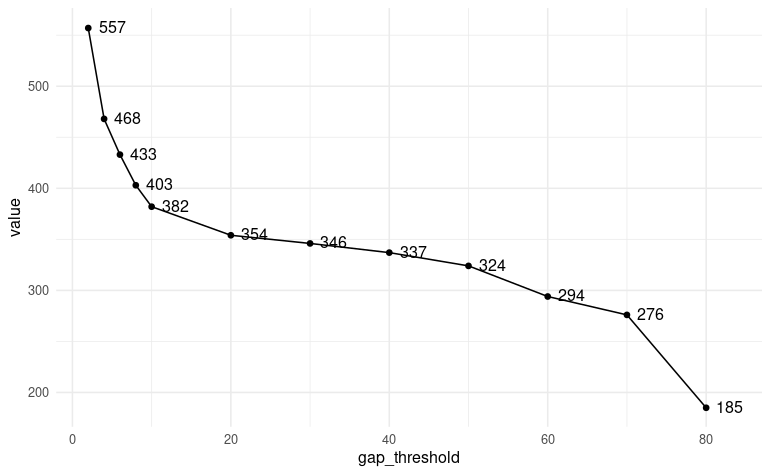

#### seq content

In [31]:
ls data/alignments_raw/"$inseq"_aligned*einsi*.fasta

data/alignments_raw/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5_aligned-mafft-einsi.fasta
(phyla_ans) 

: 1

In [37]:
dir=data/alignments_trimmed
if    [ ! -d "$dir" ]
then  mkdir  "$dir"
fi

CPU=$(nproc)

# set arrays to itterate over
allignments=data/alignments_raw/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5_aligned-mafft-einsi.fasta
gt=( 3 )
res=( .50 .60 .70 .75 .80 .90 .95 .96 .97 .98 .99 )
seq=(                          95  96  97  98  99 )

# export trimAL function so parallel can find it
function trimAL {
  # actually run trimAL for this allignment and settings combo
  trimappendix=trim-gt"$2"-res"$3"-seq"$4"
  appendix=$(echo "$1" | cut -d '/' -f 3- | sed "s/$6\_//" | sed 's/.fasta//')
  out="$5"/"$6"_"$appendix"_"$trimappendix"
  if   [ ! -f "$out".std ]
  then echo "trimming trim: $trimappendix"
       trimal -in  "$1"         \
              -out "$out".fasta \
              -resoverlap "$3"  \
              -seqoverlap "$4"  \
              -gt  ."$2"        \
              >  "$out".std     \
              2> "$out".err
  else echo "trim $trimappendix was created before"
  fi
  # this takes a lot of space: make a png snapshot of every allignment
# if    [ ! -f $out.png ]
# then  jalview -nodisplay \
#               -open $out.fasta \
#               -colour CLUSTAL \
#               -png  $out.png > /dev/null 2> /dev/null 
# fi

  # determine the allignment width and length for each allignment
  if   [ -f "$out".fasta ]
  then width=$(head -n 100 "$out".fasta                                                                     \
               | awk '/^>/ {printf("%s%s\n",(N>0?"\n":""),$0);N++;next;} {printf($0);} END {printf("\n");}' \
               | head -n 2  \
               | tail -n 1  \
               | wc -c)
       length=$(grep '>' -c "$out".fasta )
       tab_ID=$(echo -e "$6\t$appendix\t$2\t$3\t$4" )
       echo -e "$tab_ID\twidth\t$width"   >  "$out".aldimtab
       echo -e "$tab_ID\tlength\t$length" >> "$out".aldimtab
    
       # determine the gaps per sequence in this alligmnent and store it in a table.
       while read  line
       do    echo "$line"          \
             | sed    's/[A-Z]//g' \
             | wc -c
       done < <(cat "$out".fasta                                                                             \
                | awk '/^>/ {printf("%s%s\n",(N>0?"\n":""),$0);N++;next;} {printf($0);} END {printf("\n");}' \
                | grep -v '>'
                )                         \
           | sed "s/^/$tab_ID\t/" > "$out".gapfreqtab 
   fi
}

# run the trimAL sessions in parallel

parallel -j "$CPU" trimAL {1} {2} {3} {4} {5} {6}   \
         ::: "${allignments[@]}"                    \
         ::: "${gt[@]}"                             \
         ::: "${res[@]}"                            \
         ::: "${seq[@]}"                            \
         ::: "$dir"                                 \
         ::: "$inseq"

# combine small tables into bigger summary tables
cat "$dir"/*.gapfreqtab > "$dir"/allignment_gap-freq.tab
cat "$dir"/*.aldimtab   > "$dir"/allignment_dimensions.tab

(phyla_ans) (phyla_ans) (phyla_ans) (phyla_ans) (phyla_ans) (phyla_ans) (phyla_ans) (phyla_ans) (phyla_ans) (phyla_ans) (phyla_ans) (phyla_ans) (phyla_ans) (phyla_ans) (phyla_ans) (phyla_ans) trim trim-gt3-res.70-seq95 was created before
trim trim-gt3-res.70-seq96 was created before
trim trim-gt3-res.70-seq98 was created before
trim trim-gt3-res.70-seq99 was created before
trim trim-gt3-res.70-seq97 was created before
trim trim-gt3-res.75-seq96 was created before
trim trim-gt3-res.75-seq95 was created before
trim trim-gt3-res.75-seq98 was created before
trim trim-gt3-res.75-seq99 was created before
trim trim-gt3-res.75-seq97 was created before
trim trim-gt3-res.80-seq95 was created before
trim trim-gt3-res.80-seq96 was created before
trim trim-gt3-res.80-seq98 was created before
trim trim-gt3-res.80-seq99 was created before
trim trim-gt3-res.80-seq97 was created before
trim trim-gt3-res.90-seq96 was created before
trim trim-gt3-res.90-seq97 was created before
trim trim-gt3-res.90-seq98

: 1

(phyla_ans) 

: 1

Plenty of trimmed alignments were created and I made a quick heatmap to see how this incluenced length of the alignment:
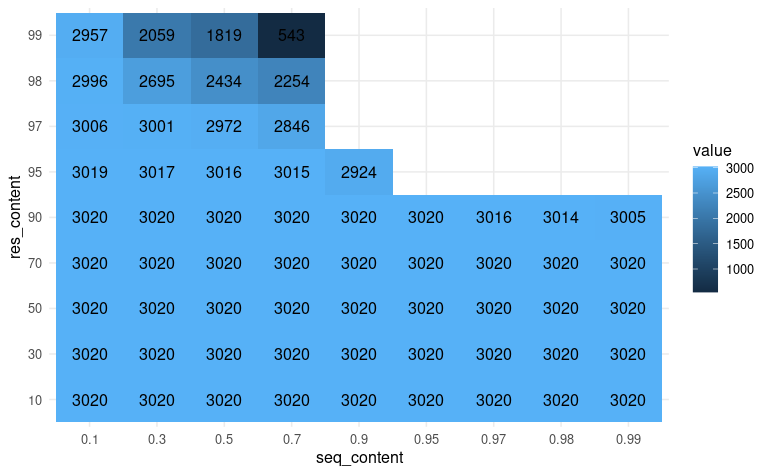

Note: Axis labels above are swapped!

This heatmap-ish figure tells me I start to loose some sequences with seq >90, the seq variable can be all over.
I'll start looking at alignments with seqcontent > 95 and any res content, and I'll make some more trims to get a better idea of what's happening.
Other data I'll remove for convenience.
Next, I wonder what the trimming does to the distribution of gaps in the total alligment (counted as the total '-' in any sequence in the alligment).

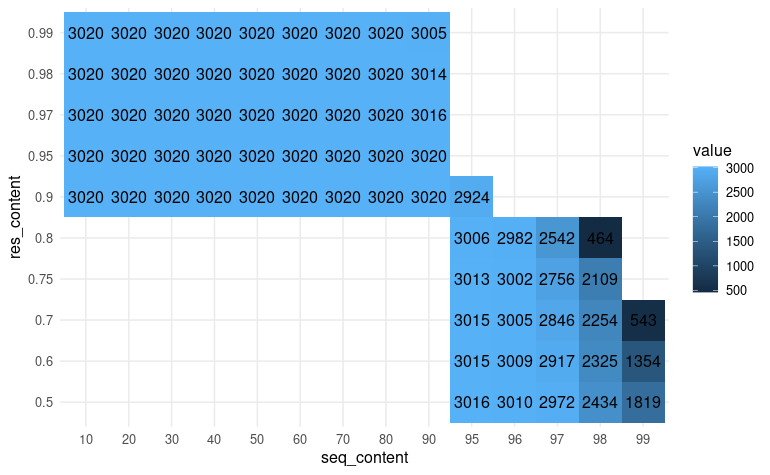

Looking at it in more detail (seq_content 95%+), I'm looking at te alligments were more than 2000 sequences are retained. 
With these settings, I'd specifically like to reduce sequences that contain a very big amount of gaps, hence I made a plot comparing this.

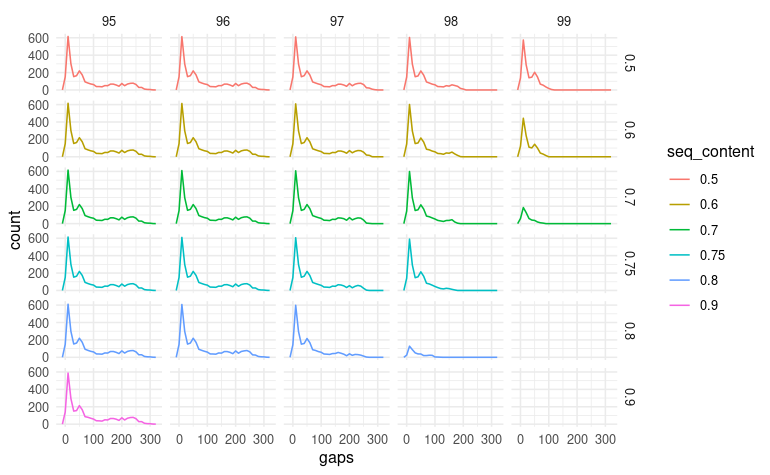

In the plot above, I'm specifically looking for allignments where specifically the high-gap part of the spectrum is reduced, and not so much the short gaps. 
I'll select a few of those and look at the aligments.
Specifically:
- .5 by 99
- .75 by 98

Now let's look at the above two trims more closely, and include .5 by 95 as a reference.
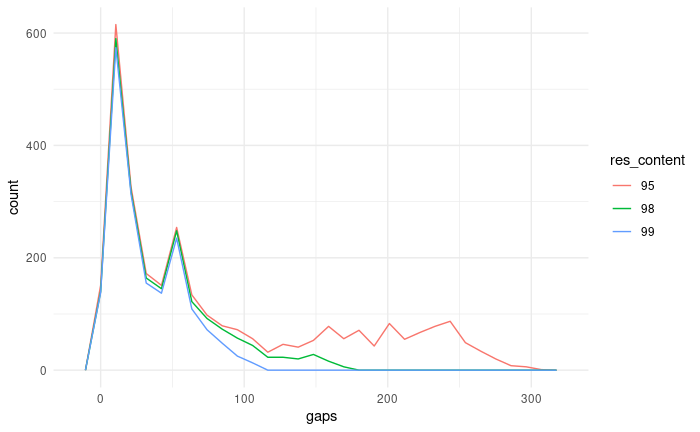

I'm liking the .5 by 99 the best from the plot, since it is most effective in removing highly gappy sequences with minimal loss of low-gap sequences.

Now let's look at the actual alignments.

### Trimmed snapshots 

In [65]:
selected_alignments=( data/alignments_trimmed/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5_aligned-mafft-einsi_trim-gt3-res.50-seq99.fasta data/alignments_trimmed/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5_aligned-mafft-einsi_trim-gt3-res.75-seq98.fasta data/alignments_trimmed/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5_aligned-mafft-einsi_trim-gt3-res.50-seq95.fasta )

(phyla_ans) 

: 1

In [66]:
for   i in "${selected_alignments}"
do    prefix=$(echo $i | sed 's/\.fasta//')
      if    [ ! -f $prefix.png ]
      then  jalview -nodisplay \
                    -open $prefix.fasta \
                    -colour CLUSTAL \
                    -png  $prefix.png > /dev/null 2> /dev/null 
      fi
done

(phyla_ans) 

: 1

#### res.50 seq 95
![](data/alignments_trimmed/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5_aligned-mafft-einsi_trim-gt3-res.50-seq95.png)

#### res.50 seq 99
![](data/alignments_trimmed/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5_aligned-mafft-einsi_trim-gt3-res.50-seq99.png)

#### res.75 seq 98
![](data/alignments_trimmed/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5_aligned-mafft-einsi_trim-gt3-res.75-seq98.png)

Now the final thing I'm wondering

### list removed sequences

In [82]:
diff \
 <(grep '>' data/alignments_trimmed/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5_aligned-mafft-einsi_trim-gt30.fasta) \
 <(grep '>' data/alignments_trimmed/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5_aligned-mafft-einsi_trim-gt3-res.50-seq99.fasta )

6,7d5
< >Azfi_s0030.g024269
< >Azfi_s0041.g026697
11,13d8
< >Azfi_s0080.g038465
< >Azfi_s0080.g038498
< >Azfi_s0108.g045269
17,18d11
< >Azfi_s0215.g058434
< >Azfi_s0015.g013955
20,22d12
< >Azfi_s0013.g013162
< >Azfi_s1653.g105323
< >Azfi_s0625.g079825
34,35d23
< >Afi_v2_s1G002400.2
< >Afi_v2_s21G000240.8
43d30
< >Afi_v2_s27G001820.1
45d31
< >Afi_v2_s44G002700.1
47d32
< >Afi_v2_s52G000700.7
49d33
< >Afi_v2_s5G005010.9
63,64d46
< >Arabidopsis_thaliana_AOP2
< >Arabidopsis_thaliana_AOP3
139d120
< >Spinacia_oleracea_GA2ox3
159d139
< >RCBT-2036263-Sphagnum_palustre
165d144
< >BNCU-2082383-Radula_lindenbergia
167d145
< >Selmo_v1_0-118442-Selaginella_moellendorffii
171,173d148
< >Poptr_v3_0-Potri_003G106900_1-Populus_trichocarpa
< >JVSZ-2122724-Equisetum_hymale
< >Ambtr_v1_0_27-AmTr_v1_0_scaffold00002_116-Amborella_trichopoda
179,184d153
< >Solly_iTAGv2_3-Solyc06g082030_2_1-Solanum_lycopersicum
< >CBAE-2050722-Huperzia_myrisinites
< >Vitvi_Genoscope_12X-GSVIVT01027753001-Vitis_vinifera
< >MEKP

< >SGTW-2000533-Ginkgo_biloba
< >CVEG-2032124-Azolla_cf._caroliniana
< >Selmo_v1_0-119186-Selaginella_moellendorffii
584d403
< >ZFRE-2006428-Phaeoceros_carolinianus-sporophyte_1575
587,588d405
< >ABSS-2004512-Sassafras_albidum
< >HPXA-2007226-Ptilidium_pulcherrimum
594d410
< >Solly_iTAGv2_3-Solyc09g018410_1_1-Solanum_lycopersicum
597,598d412
< >Vitvi_Genoscope_12X-GSVIVT01001965001-Vitis_vinifera
< >VIBO-2007532-Osmunda_javanica
600,601d413
< >ZXJO-2007769-Hemionitis_arifolia
< >Pinta_v2_0-PITA_000058451_RA-Pinus_taeda
603,604d414
< >GJPF-2006207-Allium_sativum
< >BNCU-2082966-Radula_lindenbergia
606d415
< >Nelnu_v1_0-NNU_015297_RA-Nelumbo_nucifera
608d416
< >Pinta_v2_0-PITA_000055030_RA-Pinus_taeda
611d418
< >UUHD-2013507-Porella_pinnata
613,614d419
< >Selmo_v1_0-71477-Selaginella_moellendorffii
< >CVEG-2014876-Azolla_cf._caroliniana
624d428
< >Vitvi_Genoscope_12X-GSVIVT01013258001-Vitis_vinifera
629d432
< >ALVQ-2008070-Tmesipteris_parva
633d435
< >Pinta_v2_0-PITA_000063605_RA-Pinus_t

1017d675
< >AKXB-2000980-Phaeomegaceros_coriaceus
1021,1024d678
< >Poptr_v3_0-Potri_017G135800_1-Populus_trichocarpa
< >Pinta_v2_0-PITA_000088255_RA-Pinus_taeda
< >WBOD-2004266-Magnolia_grandiflora
< >Theca_v1_1-Thecc1EG041596t1-Theobroma_cacao
1028d681
< >HPXA-2128288-Ptilidium_pulcherrimum
1033d685
< >Pinta_v2_0-PITA_000090060_RA-Pinus_taeda
1038,1041d689
< >Pinta_v2_0-PITA_000015930_RA-Pinus_taeda
< >Orysa_v7_0-LOC_Os09g07020_1-Oryza_sativa
< >Solly_iTAGv2_3-Solyc01g094590_2_1-Solanum_lycopersicum
< >Phypa_v3_0-Phpat_027G021000_1-Physcomitrella_patens
1043,1045d690
< >Mimgu_v2_0-Migut_O00881_1-Mimulus_guttatus
< >Betvu_v1_1-Bv5_119220_jndf_t1-Beta_vulgaris
< >JVSZ-2008903-Equisetum_hymale
1047,1050d691
< >GTHK-2008885-Gnetum_montanum
< >UHLI-2012258-Sphagnum_recurvatum
< >Ambtr_v1_0_27-AmTr_v1_0_scaffold00003_213-Amborella_trichopoda
< >CVEG-2023397-Azolla_cf._caroliniana
1052d692
< >Pinta_v2_0-PITA_000083020_RA-Pinus_taeda
1059d698
< >WBOD-2098574-Magnolia_grandiflora
1061d699
< >C

1399d890
< >Ambtr_v1_0_27-AmTr_v1_0_scaffold00001_51-Amborella_trichopoda
1401,1402d891
< >Vitvi_Genoscope_12X-GSVIVT01021344001-Vitis_vinifera
< >CBAE-2005414-Huperzia_myrisinites
1404,1406d892
< >Betvu_v1_1-Bv_41260_tacc_t1-Beta_vulgaris
< >Pinta_v2_0-PITA_000015499_RA-Pinus_taeda
< >Betvu_v1_1-Bv3_063050_krir_t1-Beta_vulgaris
1410,1411d895
< >Ambtr_v1_0_27-AmTr_v1_0_scaffold00125_21-Amborella_trichopoda
< >ABSS-2066567-Sassafras_albidum
1413d896
< >Nelnu_v1_0-NNU_017875_RA-Nelumbo_nucifera
1417,1421d899
< >Theca_v1_1-Thecc1EG020862t1-Theobroma_cacao
< >Pinta_v2_0-PITA_000087980_RA-Pinus_taeda
< >Ambtr_v1_0_27-AmTr_v1_0_scaffold00169_46-Amborella_trichopoda
< >SGTW-2033988-Ginkgo_biloba
< >Sorbi_v2_1-Sobic_010G068200_1-Sorghum_bicolor
1425d902
< >Solly_iTAGv2_3-Solyc01g044550_1_1-Solanum_lycopersicum
1427,1431d903
< >BNCU-2081316-Radula_lindenbergia
< >Pinta_v2_0-PITA_000066963_RA-Pinus_taeda
< >Mimgu_v2_0-Migut_G00469_1-Mimulus_guttatus
< >CBAE-2009941-Huperzia_myrisinites
< >AALA-2

< >Pinta_v2_0-PITA_000019146_RA-Pinus_taeda
1791d1108
< >ZXJO-2066379-Hemionitis_arifolia
1800d1116
< >Sorbi_v2_1-Sobic_010G054500_1-Sorghum_bicolor
1806d1121
< >Mimgu_v2_0-Migut_G00468_1-Mimulus_guttatus
1809d1123
< >Vitvi_Genoscope_12X-GSVIVT01021357001-Vitis_vinifera
1816d1129
< >OSHQ-2045275-Sarcandra_glabra
1820d1132
< >WBOD-2021071-Magnolia_grandiflora
1823d1134
< >Pinta_v2_0-PITA_000072248_RA-Pinus_taeda
1825,1826d1135
< >MUNP-2049961-Piper_auritum
< >OSHQ-2044568-Sarcandra_glabra
1828,1829d1136
< >HPXA-2005000-Ptilidium_pulcherrimum
< >ZXJO-2009768-Hemionitis_arifolia
1832d1138
< >BNCU-2082653-Radula_lindenbergia
1837,1838d1142
< >Vitvi_Genoscope_12X-GSVIVT01027752001-Vitis_vinifera
< >VIBO-2076446-Osmunda_javanica
1840,1842d1143
< >Pinta_v2_0-PITA_000085003_RA-Pinus_taeda
< >Pinta_v2_0-PITA_000016691_RA-Pinus_taeda
< >GTHK-2002974-Gnetum_montanum
1844d1144
< >JVBR-2046005-Aloe_vera
1847,1848d1146
< >Betvu_v1_1-Bv5_119120_okgh_t1-Beta_vulgaris
< >BNCU-2077199-Radula_lindenbergi

2165d1319
< >CAPN-2003999-Equisetum_diffusum
2168,2171d1321
< >Ambtr_v1_0_27-AmTr_v1_0_scaffold00022_246-Amborella_trichopoda
< >Pinta_v2_0-PITA_000095739_RA-Pinus_taeda
< >Pinta_v2_0-PITA_000090843_RA-Pinus_taeda
< >Solly_iTAGv2_3-Solyc01g108870_2_1-Solanum_lycopersicum
2174,2177d1323
< >Ambtr_v1_0_27-AmTr_v1_0_scaffold00051_95-Amborella_trichopoda
< >XZUY-2003591-Cycas_micholitzii
< >JKHA-2030895-Cyanoptyche_gloeocystis
< >PQED-2052467-Gloeochaete_wittrockiana
2179d1324
< >ABSS-2070423-Sassafras_albidum
2182d1326
< >WBOD-2097043-Magnolia_grandiflora
2184d1327
< >Phypa_v3_0-Phpat_002G004000_1-Physcomitrella_patens
2188d1330
< >TCBC-2020068-Megaceros_vincentianus
2191,2194d1332
< >UPMJ-2079278-Pseudolycopodiella_caroliniana
< >Pinta_v2_0-PITA_000035629_RA-Pinus_taeda
< >ALVQ-2092774-Tmesipteris_parva
< >CBAE-2007000-Huperzia_myrisinites
2196,2197d1333
< >Ambtr_v1_0_27-AmTr_v1_0_scaffold00033_151-Amborella_trichopoda
< >QVMR-2014117-Psilotum_nudum
2199d1334
< >Nelnu_v1_0-NNU_017876_RA-N

2549,2551d1539
< >ALVQ-2098122-Tmesipteris_parva
< >RCBT-2034515-Sphagnum_palustre
< >MEKP-2009783-Dipteris_conjugata
2554,2555d1541
< >MEKP-2103037-Dipteris_conjugata
< >Betvu_v1_1-Bv_37910_nwgk_t1-Beta_vulgaris
2558,2559d1543
< >ABSS-2067051-Sassafras_albidum
< >SGTW-2003965-Ginkgo_biloba
2563d1546
< >GJPF-2062714-Allium_sativum
2568d1550
< >ZFRE-2018843-Phaeoceros_carolinianus-sporophyte_1575
2571,2572d1552
< >GJPF-2000115-Allium_sativum
< >Solly_iTAGv2_3-Solyc09g089770_2_1-Solanum_lycopersicum
2574d1553
< >AALA-2069996-Meliosma_cuneifolia
2576,2577d1554
< >CAPN-2034210-Equisetum_diffusum
< >ENQF-2080399-Lycopodium_annotinum
2580,2583d1556
< >Betvu_v1_1-Bv7_158040_gfmh_t1-Beta_vulgaris
< >Vitvi_Genoscope_12X-GSVIVT01008914001-Vitis_vinifera
< >Mimgu_v2_0-Migut_G00466_1-Mimulus_guttatus
< >Ambtr_v1_0_27-AmTr_v1_0_scaffold00033_148-Amborella_trichopoda
2585d1557
< >Pinta_v2_0-PITA_000009566_RA-Pinus_taeda
2587,2588d1558
< >Theca_v1_1-Thecc1EG042721t1-Theobroma_cacao
< >Solly_iTAGv2_3-

2971,2972d1789
< >Micpu_v3_0-101250-Micromonas_pusilla
< >Mimgu_v2_0-Migut_F00146_1-Mimulus_guttatus
2974,2975d1790
< >UHLI-2020702-Sphagnum_recurvatum
< >Solly_iTAGv2_3-Solyc09g010010_1_1-Solanum_lycopersicum
2977d1791
< >ZFRE-2012538-Phaeoceros_carolinianus-sporophyte_1575
2979d1792
< >GJPF-2007395-Allium_sativum
2982d1794
< >Solly_iTAGv2_3-Solyc09g089700_2_1-Solanum_lycopersicum
2984d1795
< >Solly_iTAGv2_3-Solyc08g080040_2_1-Solanum_lycopersicum
2990d1800
< >CAPN-2006749-Equisetum_diffusum
2993,2994d1802
< >CAPN-2005263-Equisetum_diffusum
< >VIBO-2002780-Osmunda_javanica
2996d1803
< >Pinta_v2_0-PITA_000050969_RA-Pinus_taeda
3001,3002d1807
< >RCBT-2010843-Sphagnum_palustre
< >AKXB-2057995-Phaeomegaceros_coriaceus
3007,3008d1811
< >MEKP-2092611-Dipteris_conjugata
< >Vitvi_Genoscope_12X-GSVIVT01020354001-Vitis_vinifera
3014,3015d1816
< >Ambtr_v1_0_27-AmTr_v1_0_scaffold00193_8-Amborella_trichopoda
< >TFYI-2070128-Marchantia_emarginata
3019,3020d1819
< >CAPN-2007442-Equisetum_diffusum
< 

: 1

In [88]:
diff \
 <(grep '>' data/alignments_trimmed/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5_aligned-mafft-einsi_trim-gt30.fasta) \
 <(grep '>' data/alignments_trimmed/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5_aligned-mafft-einsi_trim-gt3-res.50-seq99.fasta ) \
| grep '^<' 

< >Azfi_s0030.g024269
< >Azfi_s0041.g026697
< >Azfi_s0080.g038465
< >Azfi_s0080.g038498
< >Azfi_s0108.g045269
< >Azfi_s0215.g058434
< >Azfi_s0015.g013955
< >Azfi_s0013.g013162
< >Azfi_s1653.g105323
< >Azfi_s0625.g079825
< >Afi_v2_s1G002400.2
< >Afi_v2_s21G000240.8
< >Afi_v2_s27G001820.1
< >Afi_v2_s44G002700.1
< >Afi_v2_s52G000700.7
< >Afi_v2_s5G005010.9
< >Arabidopsis_thaliana_AOP2
< >Arabidopsis_thaliana_AOP3
< >Spinacia_oleracea_GA2ox3
< >RCBT-2036263-Sphagnum_palustre
< >BNCU-2082383-Radula_lindenbergia
< >Selmo_v1_0-118442-Selaginella_moellendorffii
< >Poptr_v3_0-Potri_003G106900_1-Populus_trichocarpa
< >JVSZ-2122724-Equisetum_hymale
< >Ambtr_v1_0_27-AmTr_v1_0_scaffold00002_116-Amborella_trichopoda
< >Solly_iTAGv2_3-Solyc06g082030_2_1-Solanum_lycopersicum
< >CBAE-2050722-Huperzia_myrisinites
< >Vitvi_Genoscope_12X-GSVIVT01027753001-Vitis_vinifera
< >MEKP-2099672-Dipteris_conjugata
< >JVSZ-2124538-Equisetum_hymale
< >BMJR-2047525-Adiantum_tenerum
< >ALVQ-2008071-Tmesipteris_parva
< 

< >RCBT-2013636-Sphagnum_palustre
< >Poptr_v3_0-Potri_001G006900_1-Populus_trichocarpa
< >Nelnu_v1_0-NNU_013965_RA-Nelumbo_nucifera
< >Spipo_v2-Spipo23G0013900-Spirodella_polyrhiza
< >Vitvi_Genoscope_12X-GSVIVT01031822001-Vitis_vinifera
< >Ambtr_v1_0_27-AmTr_v1_0_scaffold00169_43-Amborella_trichopoda
< >UUHD-2010891-Porella_pinnata
< >UUHD-2140307-Porella_pinnata
< >Ambtr_v1_0_27-AmTr_v1_0_scaffold00062_56-Amborella_trichopoda
< >ENQF-2080861-Lycopodium_annotinum
< >Pinta_v2_0-PITA_000016690_RA-Pinus_taeda
< >Orysa_v7_0-LOC_Os08g30150_1-Oryza_sativa
< >VDAO-2002858-Ephedra_sinica
< >XZUY-2044431-Cycas_micholitzii
< >UHLI-2007975-Sphagnum_recurvatum
< >MUNP-2055700-Piper_auritum
< >Poptr_v3_0-Potri_001G228700_1-Populus_trichocarpa
< >GJPF-2003800-Allium_sativum
< >Selmo_v1_0-424759-Selaginella_moellendorffii
< >Sorbi_v2_1-Sobic_009G064700_1-Sorghum_bicolor
< >HPXA-2001783-Ptilidium_pulcherrimum
< >ENQF-2003702-Lycopodium_annotinum
< >CBAE-2002057-Huperzia_myrisinites
< >UPMJ-2015553-Pse

< >CAPN-2006607-Equisetum_diffusum
< >JKHA-2117490-Cyanoptyche_gloeocystis
< >Betvu_v1_1-Bv3_049910_rczf_t1-Beta_vulgaris
< >Ambtr_v1_0_27-AmTr_v1_0_scaffold00193_11-Amborella_trichopoda
< >RCBT-2006939-Sphagnum_palustre
< >MUNP-2009402-Piper_auritum
< >ENQF-2077341-Lycopodium_annotinum
< >Ambtr_v1_0_27-AmTr_v1_0_scaffold00324_1-Amborella_trichopoda
< >Poptr_v3_0-Potri_002G040400_1-Populus_trichocarpa
< >ALVQ-2005232-Tmesipteris_parva
< >SGTW-2001026-Ginkgo_biloba
< >Ambtr_v1_0_27-AmTr_v1_0_scaffold00324_2-Amborella_trichopoda
< >TFYI-2074312-Marchantia_emarginata
< >TCBC-2008056-Megaceros_vincentianus
< >Vitvi_Genoscope_12X-GSVIVT01008913001-Vitis_vinifera
< >WBOD-2003131-Magnolia_grandiflora
< >AALA-2012862-Meliosma_cuneifolia
< >Mimgu_v2_0-Migut_O00974_1-Mimulus_guttatus
< >Vitvi_Genoscope_12X-GSVIVT01020680001-Vitis_vinifera
< >SGTW-2001265-Ginkgo_biloba
< >WLIC-2008954-Dioon_edule
< >RCBT-2030915-Sphagnum_palustre
< >Phypa_v3_0-Phpat_005G086800_1-Physcomitrella_patens
< >BSNI-2046

< >Nelnu_v1_0-NNU_019643_RA-Nelumbo_nucifera
< >ALVQ-2100882-Tmesipteris_parva
< >UHLI-2081954-Sphagnum_recurvatum
< >CVEG-2017867-Azolla_cf._caroliniana
< >BMJR-2011052-Adiantum_tenerum
< >WBOD-2019565-Magnolia_grandiflora
< >XZUY-2010830-Cycas_micholitzii
< >ABSS-2065907-Sassafras_albidum
< >OSHQ-2041778-Sarcandra_glabra
< >ENQF-2078280-Lycopodium_annotinum
< >Pinta_v2_0-PITA_000023239_RA-Pinus_taeda
< >ALVQ-2005234-Tmesipteris_parva
< >XZUY-2006025-Cycas_micholitzii
< >Pinta_v2_0-PITA_000076299_RA-Pinus_taeda
< >GJPF-2059526-Allium_sativum
< >CBAE-2002180-Huperzia_myrisinites
< >MUNP-2002911-Piper_auritum
< >CBAE-2002181-Huperzia_myrisinites
< >UPMJ-2080550-Pseudolycopodiella_caroliniana
< >Mimgu_v2_0-Migut_B01528_1-Mimulus_guttatus
< >CBAE-2012931-Huperzia_myrisinites
< >Betvu_v1_1-Bv7_157980_hdhf_t1-Beta_vulgaris
< >CBAE-2000568-Huperzia_myrisinites
< >UHLI-2019587-Sphagnum_recurvatum
< >HPXA-2001782-Ptilidium_pulcherrimum
< >AALA-2076097-Meliosma_cuneifolia
< >UPMJ-2075587-Pseudo

< >ENQF-2079593-Lycopodium_annotinum
< >BNCU-2010784-Radula_lindenbergia
< >Betvu_v1_1-Bv9_226570_apay_t1-Beta_vulgaris
< >Selmo_v1_0-134544-Selaginella_moellendorffii
< >Orysa_v7_0-LOC_Os09g18520_1-Oryza_sativa
< >Orysa_v7_0-LOC_Os06g07914_1-Oryza_sativa
< >ENQF-2008794-Lycopodium_annotinum
< >BNCU-2080974-Radula_lindenbergia
< >ZFRE-2101810-Phaeoceros_carolinianus-sporophyte_1575
< >WLIC-2007310-Dioon_edule
< >Vitvi_Genoscope_12X-GSVIVT01011670001-Vitis_vinifera
< >ABSS-2006073-Sassafras_albidum
< >Pinta_v2_0-PITA_000089953_RA-Pinus_taeda
< >Pinta_v2_0-PITA_000014784_RA-Pinus_taeda
< >ALVQ-2094630-Tmesipteris_parva
< >ABSS-2000068-Sassafras_albidum
< >OSHQ-2045519-Sarcandra_glabra
< >Pinta_v2_0-PITA_000094616_RA-Pinus_taeda
< >Orysa_v7_0-LOC_Os05g05670_1-Oryza_sativa
< >XZUY-2048724-Cycas_micholitzii
< >Arath_TAIR10-AT3G49620_1-Arabidopsis_thaliana
< >Pinta_v2_0-PITA_000087522_RA-Pinus_taeda
< >JVBR-2007999-Aloe_vera
< >CBAE-2004178-Huperzia_myrisinites
< >Orysa_v7_0-LOC_Os05g11810_1

< >CBAE-2004181-Huperzia_myrisinites
< >Mimgu_v2_0-Migut_I00167_1-Mimulus_guttatus
< >Selmo_v1_0-424757-Selaginella_moellendorffii
< >SGTW-2003958-Ginkgo_biloba
< >XZUY-2000064-Cycas_micholitzii
< >SGTW-2000272-Ginkgo_biloba
< >MEKP-2094168-Dipteris_conjugata
< >Nelnu_v1_0-NNU_018332_RA-Nelumbo_nucifera
< >Poptr_v3_0-Potri_018G118700_1-Populus_trichocarpa
< >Pinta_v2_0-PITA_000093838_RA-Pinus_taeda
< >Vitvi_Genoscope_12X-GSVIVT01019892001-Vitis_vinifera
< >GOWD-2082268-Sphagnum_lescurii
< >Vitvi_Genoscope_12X-GSVIVT01025428001-Vitis_vinifera
< >MEKP-2006718-Dipteris_conjugata
< >RCBT-2024950-Sphagnum_palustre
< >VIBO-2009690-Osmunda_javanica
< >ZFRE-2012426-Phaeoceros_carolinianus-sporophyte_1575
< >Pinta_v2_0-PITA_000079491_RA-Pinus_taeda
< >VDAO-2003936-Ephedra_sinica
< >Theca_v1_1-Thecc1EG020855t1-Theobroma_cacao
< >CBAE-2001513-Huperzia_myrisinites
< >Phypa_v3_0-Phpat_016G039200_1-Physcomitrella_patens
< >JVSZ-2006267-Equisetum_hymale
< >Pinta_v2_0-PITA_000059220_RA-Pinus_taeda
< >

< >RCBT-2030916-Sphagnum_palustre
< >HPXA-2013409-Ptilidium_pulcherrimum
< >ABSS-2068106-Sassafras_albidum
< >GJPF-2011581-Allium_sativum
< >VIBO-2003313-Osmunda_javanica
< >AALA-2070948-Meliosma_cuneifolia
< >VDAO-2031412-Ephedra_sinica
< >UPMJ-2015487-Pseudolycopodiella_caroliniana
< >ALVQ-2101839-Tmesipteris_parva
< >Orysa_v7_0-LOC_Os11g16460_1-Oryza_sativa
< >Micpu_v3_0-101250-Micromonas_pusilla
< >Mimgu_v2_0-Migut_F00146_1-Mimulus_guttatus
< >UHLI-2020702-Sphagnum_recurvatum
< >Solly_iTAGv2_3-Solyc09g010010_1_1-Solanum_lycopersicum
< >ZFRE-2012538-Phaeoceros_carolinianus-sporophyte_1575
< >GJPF-2007395-Allium_sativum
< >Solly_iTAGv2_3-Solyc09g089700_2_1-Solanum_lycopersicum
< >Solly_iTAGv2_3-Solyc08g080040_2_1-Solanum_lycopersicum
< >CAPN-2006749-Equisetum_diffusum
< >CAPN-2005263-Equisetum_diffusum
< >VIBO-2002780-Osmunda_javanica
< >Pinta_v2_0-PITA_000050969_RA-Pinus_taeda
< >RCBT-2010843-Sphagnum_palustre
< >AKXB-2057995-Phaeomegaceros_coriaceus
< >MEKP-2092611-Dipteris_conjuga

: 1

I'd like to add these sequences back in again, they are guide- or Azolla sequences:
```
Azfi_s0030.g024269
Azfi_s0041.g026697
Azfi_s0080.g038465
Azfi_s0080.g038498
Azfi_s0108.g045269
Azfi_s0215.g058434
Azfi_s0015.g013955
Azfi_s0013.g013162
Azfi_s1653.g105323
Azfi_s0625.g079825
Afi_v2_s1G002400.2
Afi_v2_s21G000240.8
Afi_v2_s27G001820.1
Afi_v2_s44G002700.1
Afi_v2_s52G000700.7
Afi_v2_s5G005010.9
>Arabidopsis_thaliana_AOP2
>Arabidopsis_thaliana_AOP3
>Spinacia_oleracea_GA2ox3
```

In [102]:
diff \
 <(grep '>' data/alignments_trimmed/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5_aligned-mafft-einsi_trim-gt30.fasta) \
 <(grep '>' data/alignments_trimmed/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5_aligned-mafft-einsi_trim-gt3-res.50-seq99.fasta ) \
| grep '^<' | grep -vP '[A-Z]{4,4}-' | grep -vP '[A-Z][a-z]{4,4}_' | cut -c 3- > data/alignments_trimmed/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5_aligned-mafft-einsi_trim-gt3-supplement.txt

(phyla_ans) 

: 1

In [115]:
cp data/alignments_trimmed/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5_aligned-mafft-einsi_trim-gt3-res.50-seq99.fasta \
data/alignments_trimmed/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5_aligned-mafft-einsi_trim-gt3-res.50-seq99-supplmented.fasta 


(phyla_ans) 

: 1

In [116]:
cat data/alignments_trimmed/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5_aligned-mafft-einsi_trim-gt30.fasta \
| awk '/^>/ {printf("%s%s\n",(N>0?"\n":""),$0);N++;next;} {printf($0);} END {printf("\n");}' \
| grep -A 1 --no-group-separator -f data/alignments_trimmed/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5_aligned-mafft-einsi_trim-gt3-supplement.txt \
>> data/alignments_trimmed/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5_aligned-mafft-einsi_trim-gt3-res.50-seq99-supplmented.fasta 

(phyla_ans) 

: 1

In [117]:
prefix=data/alignments_trimmed/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5_aligned-mafft-einsi_trim-gt3-res.50-seq99-supplmented
jalview -nodisplay \
        -open $prefix.fasta \
        -colour CLUSTAL \
        -png  $prefix.png

(phyla_ans) Cannot get screen resolution: 
No X11 DISPLAY variable was set, but this program performed an operation which requires it.
Cannot get screen size height and width:
No X11 DISPLAY variable was set, but this program performed an operation which requires it.
Running jalview.bin.Jalview with memory setting -Xmx34359738368
Java version: 11.0.13
Java Home: /home/laura/miniconda3/envs/phyla_ans
amd64 Linux 5.4.0-107-generic
Jalview Version: 2.11.1.4 (bioconda (build 1) git-commit: [])
Ignoring SO:0001957 as obsolete and duplicated by SO:0001979
Ignoring SO:0000437 as obsolete and duplicated by SO:0000800
Ignoring SO:0000554 as obsolete and duplicated by SO:0000801
Ignoring SO:0000767 as obsolete and duplicated by SO:0000179
Ignoring SO:0000058 as obsolete and duplicated by SO:0000803
Ignoring SO:0001052 as obsolete and duplicated by SO:0001649
Ignoring SO:0000052 as obsolete and duplicated by SO:0000802
Ignoring SO:0001053 as obsolete and duplicated by SO:0001648
Loaded Sequence O

: 1

![](data/alignments_trimmed/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5_aligned-mafft-einsi_trim-gt3-res.50-seq99-supplmented.png)

### trimming conclusion
When looking at the alignments, there is a clear winner in my eyes.
The res.50 seq 99 alignment has the least gaps in the major conserved domains.

# 4. Fast tree building
Here we'll make fast trees: not acurate, no bootstraps, but fast. This gives us an idea of the output and how we will process it. Building 'propper' trees can take days sometimes weeks, so it's better to be sure you have all sequences in there you want before you start. 

I use two ways to make thise fast trees, first with a program called `fasttree` and second with the programm `iqtree` with the `-fast` parameter. My gut feeling is that the latter is a bit more acurate but takes a couple of minutes. Fasttree takes seconds.

I arbitrarily consider trees to be analyses and not data, hence I store these in the `analyses` directory.

Since these trees run fast (just take a second to consider how rediculous that sounds) I propose to run these in loops again, taking all the trimmed alignments that were made earlier. The trees run in parallel on one CPU. If you're running many trees (way more than you have computing cores) then don't run these in the background. Practically, that means removing the `&` character almost at the end of the loop.

## 4.2 IQtree -fast

And here is the same but for running iqtree. I picked some random model here, but substitute it by anything you like better or have good experience with it the past.

### iqtree fast for column trimmed tree

In [81]:
a=data/alignments_trimmed/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5_aligned-mafft-einsi_trim-gt30.fasta
echo "making a iqtree fast tree of file $a"
appendix=$(echo $a | cut -d '/' -f 3- | sed "s/$inseq\_//" | sed "s/.fasta//")
echo $appendix
if   [ ! -d   analyses/"$inseq"_fasttrees/"$appendix" ]
then mkdir -p analyses/"$inseq"_fasttrees/"$appendix"
fi

iqprefix=analyses/"$inseq"_fasttrees/"$appendix"/"$inseq"_"$appendix"_iqtree-fast
if   [ ! -f "$iqprefix".iqtree ]
then nice iqtree -s $a -fast \
                 -m 'LG+R7' \
                 -pre "$iqprefix" \
                 > "$iqprefix".stdout \
                 2> "$iqprefix".stderr &
fi


(phyla_ans) making a iqtree fast tree of file data/alignments_trimmed/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5_aligned-mafft-einsi_trim-gt30.fasta
(phyla_ans) (phyla_ans) aligned-mafft-einsi_trim-gt30
(phyla_ans) (phyla_ans) (phyla_ans) (phyla_ans) [1] 3389954
(phyla_ans) 

: 1

Now take failed sequences from the IQtree run, but only remove RNAseq data. 
I'm assuming the genome assemblies included are good enough "not to be wrong", whilst with RNAseq, I assume that many short sequences are due to misassembly.
Of course we know that mis-annotation of many genomes leads to shorter sequences to, but for now I'll keep them in.

In [ ]:
iqprefix=analyses/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5_fasttrees/aligned-mafft-einsi_trim-gt30/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5_aligned-mafft-einsi_trim-gt30_iqtree-fast
grep -P '%\W+failed' $iqprefix.stdout 

In [199]:
grep -P '%\W+failed' $iqprefix.stdout \
| sed -E 's/^\W*//'                   \
| sed -E 's/ +/\t/g'                  \
| cut -f 1,2                          \
| grep -P '[A-Z]{4,4}-'               \
| cut -f 1                            \
| awk '{print ($1 - 1)}'              \
| tr '\n' ,                           \
| sed 's/,$//'                        \
| tee analyses/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5_fasttrees/aligned-mafft-einsi_trim-gt30/sequence_nrs_to_remove.txt

158,303,329,405,480,611,799,837,928,955,989,1002,1008,1044,1112,1120,1153,1161,1246,1313,1334,1349,1463,1547,1571,1659,1843,1872,1987,1996,2007,2012,2196,2234,2321,2395,2423,2463,2467,2549,2592,2649,2684,2720,2821,2925,2980

In [200]:
grep -P '%\W+failed' $iqprefix.stdout \
| sed -E 's/^\W*[0-9]+\W+//'          \
| cut -f 1 -d ' '                     \
| grep -P '^[A-Z]{4,4}-'              \
| tee analyses/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5_fasttrees/aligned-mafft-einsi_trim-gt30/sequences_to_remove.txt

RCBT-2036263-Sphagnum_palustre
ABSS-2070770-Sassafras_albidum
AKXB-2010751-Phaeomegaceros_coriaceus
BSNI-2011343-Anthoceros_agrestis-B
BNCU-2018171-Radula_lindenbergia
GTHK-2056543-Gnetum_montanum
AALA-2008926-Meliosma_cuneifolia
CVEG-2124994-Azolla_cf._caroliniana
GTHK-2007868-Gnetum_montanum
TCBC-2001149-Megaceros_vincentianus
RCBT-2033972-Sphagnum_palustre
AKXB-2008530-Phaeomegaceros_coriaceus
AKXB-2010161-Phaeomegaceros_coriaceus
JVSZ-2008903-Equisetum_hymale
GTHK-2014584-Gnetum_montanum
MEKP-2105318-Dipteris_conjugata
MUNP-2009402-Piper_auritum
ZFRE-2115838-Phaeoceros_carolinianus-sporophyte_1575
CBAE-2004182-Huperzia_myrisinites
JVBR-2001205-Aloe_vera
BSNI-2050021-Anthoceros_agrestis-B
GJPF-2004077-Allium_sativum
BSNI-2050054-Anthoceros_agrestis-B
OSHQ-2044164-Sarcandra_glabra
OSHQ-2041778-Sarcandra_glabra
BSNI-2007493-Anthoceros_agrestis-B
JVBR-2046005-Aloe_vera
UPMJ-2078183-Pseudolycopodiella_caroliniana
BSNI-2007492-Anthoceros_agrestis-B
GJPF-2001291-Allium_sativum
ENQF-200387

In [202]:
trimal -in data/alignments_trimmed/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5_aligned-mafft-einsi_trim-gt30.fasta          \
       -selectseqs { $(cat analyses/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5_fasttrees/aligned-mafft-einsi_trim-gt30/sequence_nrs_to_remove.txt) } \
       -out data/alignments_trimmed/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5_aligned-mafft-einsi_trim-gt30-iqtree-seq-check.fasta

(phyla_ans) (phyla_ans) 

: 1

In [203]:
grep '>' -c  data/alignments_trimmed/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5_aligned-mafft-einsi_trim-gt30*fasta

data/alignments_trimmed/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5_aligned-mafft-einsi_trim-gt30.fasta:3020
data/alignments_trimmed/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5_aligned-mafft-einsi_trim-gt30-iqtree-seq-check.fasta:2973
(phyla_ans) 

: 1

No huge benefits here, but it will do.

### iqtree fast for collumn and sequence trimmed tree

In [109]:
ls -sh data/alignments_trimmed/$inseq*gt3-res.50-seq99*.fasta

696K data/alignments_trimmed/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5_aligned-mafft-einsi_trim-gt3-res.50-seq99.fasta
704K data/alignments_trimmed/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5_aligned-mafft-einsi_trim-gt3-res.50-seq99-supplmented.fasta
(phyla_ans) 

: 1

In [118]:
a=data/alignments_trimmed/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5_aligned-mafft-einsi_trim-gt3-res.50-seq99-supplmented.fasta
echo "making a iqtree fast tree of file $a"
appendix=$(echo $a | cut -d '/' -f 3- | sed "s/$inseq\_//" | sed "s/.fasta//")
echo $appendix
if   [ ! -d   analyses/"$inseq"_fasttrees/"$appendix" ]
then mkdir -p analyses/"$inseq"_fasttrees/"$appendix"
fi

iqprefix=analyses/"$inseq"_fasttrees/"$appendix"/"$inseq"_"$appendix"_iqtree-fast
if   [ ! -f "$iqprefix".iqtree ]
then nice iqtree -s $a -fast \
                 -m 'LG+R7' \
                 -nt AUTO \
                 -ntmax $(nproc)  \
                 -pre "$iqprefix" \
                 > "$iqprefix".stdout \
                 2> "$iqprefix".stderr &
else echo 'tree exists'
fi


(phyla_ans) making a iqtree fast tree of file data/alignments_trimmed/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5_aligned-mafft-einsi_trim-gt3-res.50-seq99-supplmented.fasta
(phyla_ans) (phyla_ans) aligned-mafft-einsi_trim-gt3-res.50-seq99-supplmented
(phyla_ans) (phyla_ans) (phyla_ans) (phyla_ans) [1] 3877742
(phyla_ans) 

: 1

In [124]:
tail $iqprefix.stdout

Total CPU time used: 10574.677 sec (2h:56m:14s)
Total wall-clock time used: 1802.081 sec (0h:30m:2s)

Analysis results written to: 
  IQ-TREE report:                analyses/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5_fasttrees/aligned-mafft-einsi_trim-gt3-res.50-seq99-supplmented/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5_aligned-mafft-einsi_trim-gt3-res.50-seq99-supplmented_iqtree-fast.iqtree
  Maximum-likelihood tree:       analyses/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5_fasttrees/aligned-mafft-einsi_trim-gt3-res.50-seq99-supplmented/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5_aligned-mafft-einsi_trim-gt3-res.50-seq99-supplmented_iqtree-fast.treefile
  Likelihood distances:          analyses/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5_fasttrees/aligned-mafft-einsi_trim-gt3-res.50-seq99-supplmented/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5_aligned-mafft-einsi_trim-gt3-res.50-seq99-supplmented_iqtree-fast.mldist
  Screen log file:           

: 1

## 4.3 Visualise your fast trees. 

To visualise your trees, you perhaps already have something installed like mega, seaview, etc. Otherwise you can upload the tree file to [iToL](https://itol.embl.de/) (my prefered method) or any other website that visualises trees. See section 6 for uploading your trees to iToL.

Alternativelly, we can try to get a quick snapshot here in the notebook:

the first fast-tree is very big still (3020 sequences) and contains some very very long branches.
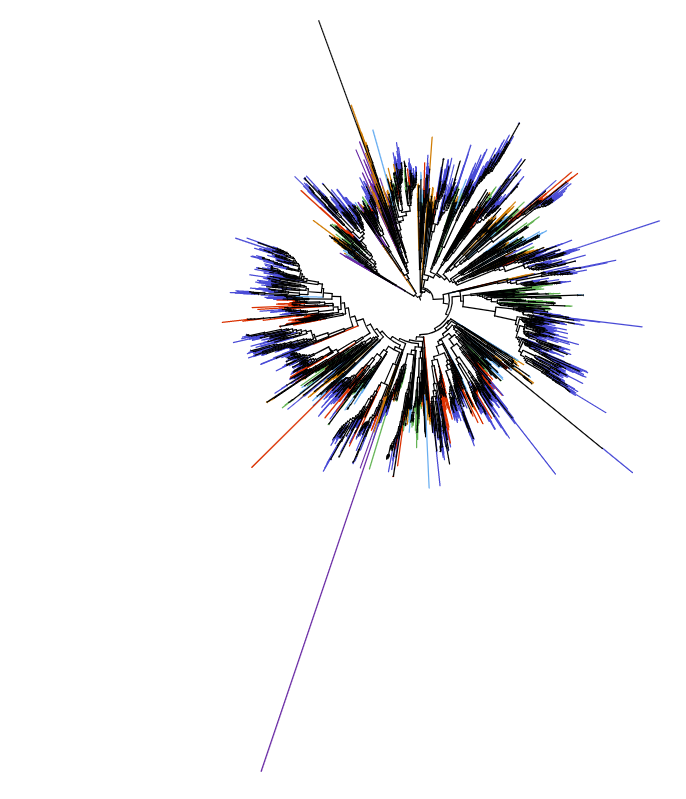

The second tree (which had some azfi sequences removed) looks a lot better and more manageble. 
It entails 1819 sequences, which is a huge reduction, but big clades are still visible and distinguisable. 
Orthology can be inferred from a tree like this for the big clades, which is what we're after.
Additionally, the branches have nice lenghts, no saturation etcetera.

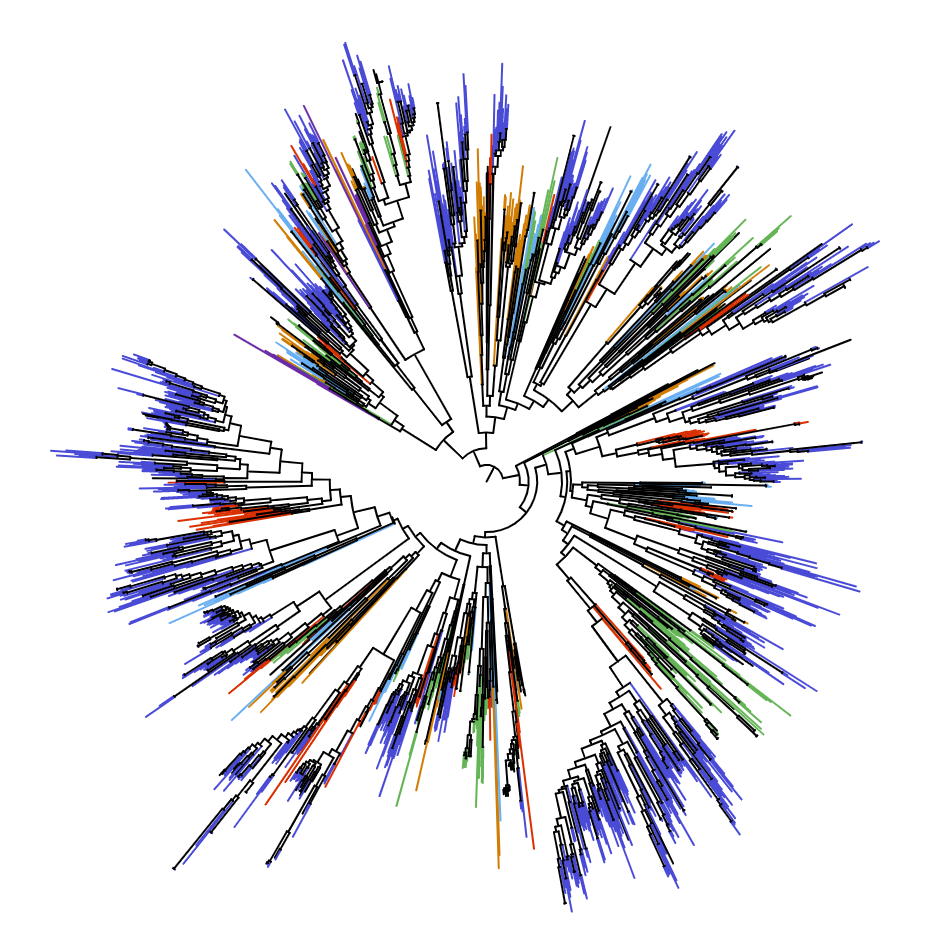


Finally the tree above, but with some extra Azolla sequences in there:
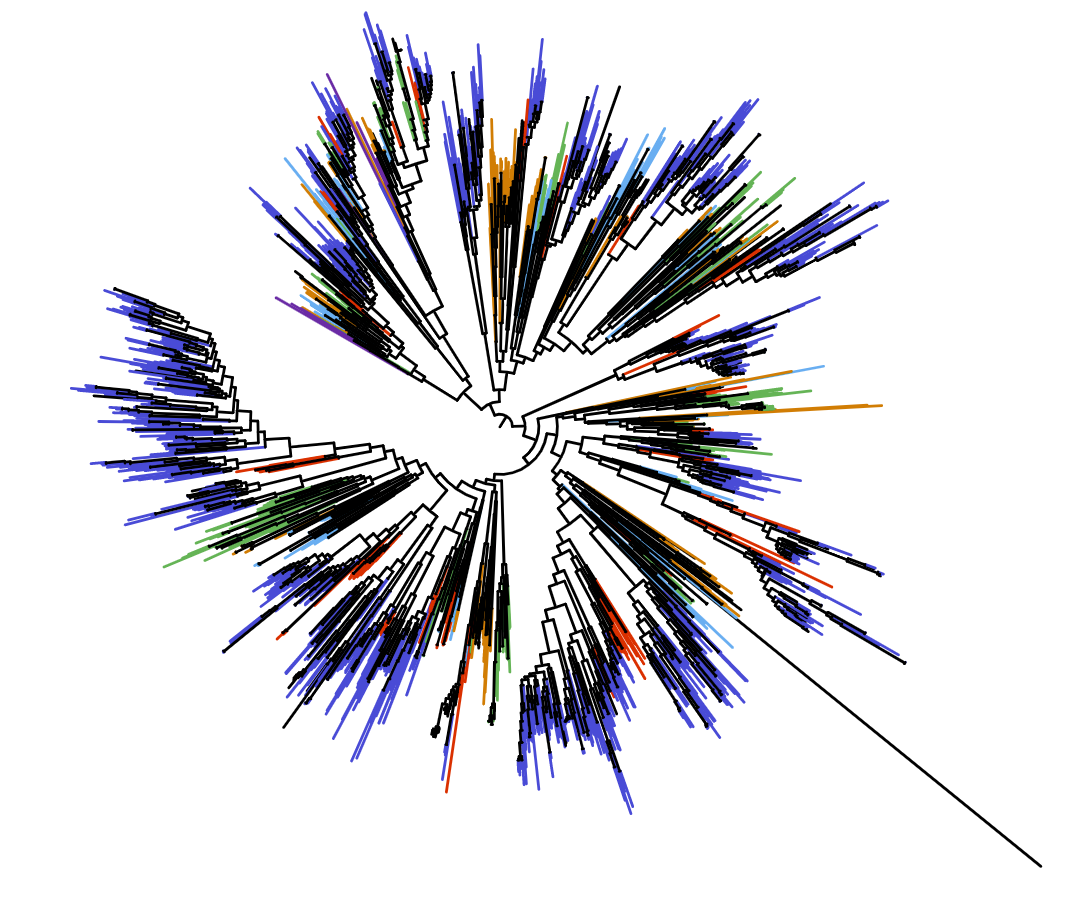

Except for that one rediculous long branch, this seems ok to me. I'm taking this alligment to the final tree inference stage!

# 5. Building trees with IQtree 

Finally, we're at the stage to build propper maximum likelyhood phylogenetic trees! Based on your previous results, you should have one or two trimmed alignments you want to make a tree of. There is several choices to make still: a model of evolution and a bootstrapping method.

**modelfinder**

IQtree is a state-of-the art tree buildling program, which has a model finder algorithm included! This can take a couple of hours, so be sure to do this only once. There is two model finder options, a quick one with some often used models: `-m TEST` or an extended modelfinder, using more models of evolution and substitution: `-m MFP`. I recommend the latter. Once you have your best-fit model (for example: 'LG+R7') then use this model when you build more trees from the same alignment: `-m 'LG+R7'`

**bootstrapping**

Normal or 'non-parametric' bootstrapping can take quite a long time; I have had trees running for weeks. Hence there is alternatives that are a lot faster but might over or underestimate the bootstrap values if your alignment doesn't fit your model well. To use 'normal bootstraps' the minimum is 100. That's why I like to to 200 to be safe, by adding the option `-b 200`.

Alternativelly, there is the 'ultrafast bootstrap' option in IQtree. The minumum for this is 1000 bootstraps, so I'd like to do double by including the parameter: `-bb 2000`. Additionally, I highly recommend also running the approximate likelyhood ratio test for 2000 bootstraps at the same time by including parameters `-alrt 2000`. This adds a minimal amount of run time and makes interpretation of your tree a lot more reliable.

As the [IQtree FAQ](http://www.iqtree.org/doc/Frequently-Asked-Questions#how-do-i-interpret-ultrafast-bootstrap-ufboot-support-values) says: typically you start believing a clade when the ultra fast bootstraps => 95 and alrt => 80. Interpretation of these values is not linear like 'normal' bootstrap, hence if you lower the threshold of ultrafast bootstraps to 90, you will likely enormously overestimate your results. 

**other command-line options**

In the commandline I wrote below, I instruct iqtree to use no more CPU cores than your computer has, but also to find the optimum amount of cores (more is not always better). Second, a prefix is defined to store the different trees that IQtree wil make.

**More info**
* iqtree tutorial: http://www.iqtree.org/doc/Tutorial
* aLRT: https://www.ncbi.nlm.nih.gov/pubmed/16785212





## running IQtree

Now these are all trimmed alignments you have available. 
Choose one to start with (based on your fasttrees or inspections of your alignments).

Make sure that 
1. the path to this alignment is the variable `$a` 
2. you choose an appendix based on your iqtree settings

In [122]:
ls data/alignments_trimmed/"$inseq"_aligned*supplmented.fasta

data/alignments_trimmed/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5_aligned-mafft-einsi_trim-gt3-res.50-seq99-supplmented.fasta
(phyla_ans) 

: 1

In [ ]:
a=data/alignments_trimmed/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5_aligned-mafft-einsi_trim-gt3-res.50-seq99-supplmented.fasta

iqpendix='iqtree-b200'
#iqpendix='iqtree-bb1000-alrt1000'

echo "making a tree of file $a"
echo "The first lines of alignment $a look like this"
head $a

file_appendix=$(echo $a | cut -d '/' -f 3- | sed "s/$inseq\_//" | sed "s/.fasta//")
echo "Making a directory $file_appendix to store trees (name based on alignment filename)"

if   [ ! -d    analyses/"$inseq"_trees/"$file_appendix" ]
then mkdir -p  analyses/"$inseq"_trees/"$file_appendix" 
fi

iqprefix=analyses/"$inseq"_trees/"$file_appendix"/"$inseq"_"$file_appendix"_"$iqpendix"
if   [ ! -f "$iqprefix".tree ]
then nice iqtree -s $a \
                 -m 'LG+F+R10' \
                 -b 200 \
                 -nt AUTO \
                 -ntmax $(nproc)  \
                 -pre  "$iqprefix" \
                 2>   "$iqprefix".stderr \
                 >    "$iqprefix".stdout \
                 && cat "$iqprefix".out | mail -s ANS_IQtree_run laura.w.dijkhuizen@gmail.com
fi

(phyla_ans) (phyla_ans) (phyla_ans) (phyla_ans) (phyla_ans) making a tree of file data/alignments_trimmed/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5_aligned-mafft-einsi_trim-gt3-res.50-seq99-supplmented.fasta
(phyla_ans) The first lines of alignment data/alignments_trimmed/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5_aligned-mafft-einsi_trim-gt3-res.50-seq99-supplmented.fasta look like this
(phyla_ans) >Azfi_s0092.g043107
MATIQSIKELVDAGLCHVPSIYIRPPNERPNFQDVVECENIPIISFANMF-GHNREHIVE
QVRHACLDWGVFQVTNHCVPTDVVTKIWTVTSEFFALPTSEKVSFNSDPSFPMYFFTGFY
-RDERIREWKDTLGFK--PSS---I-TDTNLIPTFLRDPMLNFYTDTKNLAHLVGELVAL
SLGIDTTVLHKHF---SRQTIGMNYYPTCPQPDLAFGLSSHSDFGSITLLMQD-AEGLQV
KKGDEWVNVKVIPNSFIVLIGDQLEILTNGHYKSVEHRVLTNTNKPRMSIGCFFGPHDSD
KIGPIDKFISDDKPTVYKETMFGDYLKHGFGKELNGKSNLEFSIR
>Azfi_s0003.g007795
MDELPCLQELVDAGLSSVPSAYIRPPHERP--SDSSNAAQIP------------------
-------------VINHGVPHDVMIEMRASCSRFFQQPPEMRNIYRSSFDDPLAYSTSFN
(phyla_ans) (phyla_ans) (phyla_ans) Making a directory aligned-mafft-

In [127]:
ls $iqprefix* -1

analyses/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5_trees/aligned-mafft-einsi_trim-gt3-res.50-seq99-supplmented/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5_aligned-mafft-einsi_trim-gt3-res.50-seq99-supplmented_iqtree-b200.bionj
analyses/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5_trees/aligned-mafft-einsi_trim-gt3-res.50-seq99-supplmented/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5_aligned-mafft-einsi_trim-gt3-res.50-seq99-supplmented_iqtree-b200.boottrees
analyses/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5_trees/aligned-mafft-einsi_trim-gt3-res.50-seq99-supplmented/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5_aligned-mafft-einsi_trim-gt3-res.50-seq99-supplmented_iqtree-b200.ckp.gz
analyses/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5_trees/aligned-mafft-einsi_trim-gt3-res.50-seq99-supplmented/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5_aligned-mafft-einsi_trim-gt3-res.50-seq99-supplmented_iqtree-b200.contree
analyses/orthogroup_AtLDOX_AT

: 1

You can have a look at the last lines of your log file like this:

In [128]:
tail -n 40 $iqprefix.log

25. Current log-likelihood: -600780.825
Optimal log-likelihood: -600780.822
Site proportion and rates:  (0.034,0.038) (0.046,0.124) (0.033,0.218) (0.069,0.341) (0.093,0.511) (0.126,0.696) (0.188,0.918) (0.228,1.274) (0.114,1.783) (0.070,2.310)
Parameters optimization took 25 rounds (478.431 sec)
BEST SCORE FOUND : -600780.822
Total tree length: 584.685

Total number of iterations: 923
CPU time used for tree search: 341515.106 sec (94h:51m:55s)
Wall-clock time used for tree search: 58219.364 sec (16h:10m:19s)
Total CPU time used: 347403.429 sec (96h:30m:3s)
Total wall-clock time used: 59226.351 sec (16h:27m:6s)
Reading input trees file analyses/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5_trees/aligned-mafft-einsi_trim-gt3-res.50-seq99-supplmented/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5_aligned-mafft-einsi_trim-gt3-res.50-seq99-supplmented_iqtree-b200.contree
Log-likelihood of consensus tree: -601020.713

===> ASSIGN BOOTSTRAP SUPPORTS TO THE TREE FROM ORIGINAL ALIGNMENT


: 1

#### now let's do the transferbootstraps for this is a huge tree

In [129]:
conda activate booster
inseq='orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5'
for t in ./analyses/"$inseq"_trees/aligned*/*.boottrees
do  prefix=$(echo $t | sed 's/\.boottrees//g')
    booster -i $prefix.treefile \
            -b $t \
            -o "$prefix"_booster.treefile \
            -c \
            -S "$prefix"_booster.stats \
            -r "$prefix"_booster.raw
done
conda deactivate

(booster) (booster) **************************
*         Options        *
**************************
booster : version 0.1.2
Input Tree      : ./analyses/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5_trees/aligned-mafft-einsi_trim-gt3-res.50-seq99-supplmented/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5_aligned-mafft-einsi_trim-gt3-res.50-seq99-supplmented_iqtree-b200.treefile
Bootstrap Trees : ./analyses/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5_trees/aligned-mafft-einsi_trim-gt3-res.50-seq99-supplmented/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5_aligned-mafft-einsi_trim-gt3-res.50-seq99-supplmented_iqtree-b200.boottrees
Output tree     : ./analyses/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5_trees/aligned-mafft-einsi_trim-gt3-res.50-seq99-supplmented/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5_aligned-mafft-einsi_trim-gt3-res.50-seq99-supplmented_iqtree-b200_booster.treefile
Output raw tree : ./analyses/orthogroup_AtLDOX_AT4g22880_selection-v2_guid

: 1

Are you content with your tree? Great news! If you want to do another run, I recommend copying the cell above and editing the copy. That way you keep the code for all trees you made. Don't forget to explain what you observed, why you're making a new tree, and what you're changing (remember this is your labjournal). 

# tree storage

For tree storage and sharing, I have yet to encounter a better tool than EMBLs [iToL](https://itol.embl.de/). It's a great interface for exploring and sharing trees with colleagues. You can browse to the treefile IQtree created on your computer and upload it to iToL. Alternativelly, you can copy paste the contents of the file to iToL. Make sure to keep the original filename as well! This file name now contains a brief summary of how this tree was made.

The tree is stored on itol here:https://itol.embl.de/tree/13121158237202551656678379

I applied the previous annotation file to this tree, then exported it as svg to inkscape.
This was a bit sloppy because the colours don't match up perfectly, but I chose to fix that in inkscape for the final figure.


![](figures/v2g5_transfer_bootstrap_snapshot.png)

I'm removing one Azolla sequence for it makes no sense in the tree and when inspecting the alignment, it doesn't match up well with the other 2ogds:
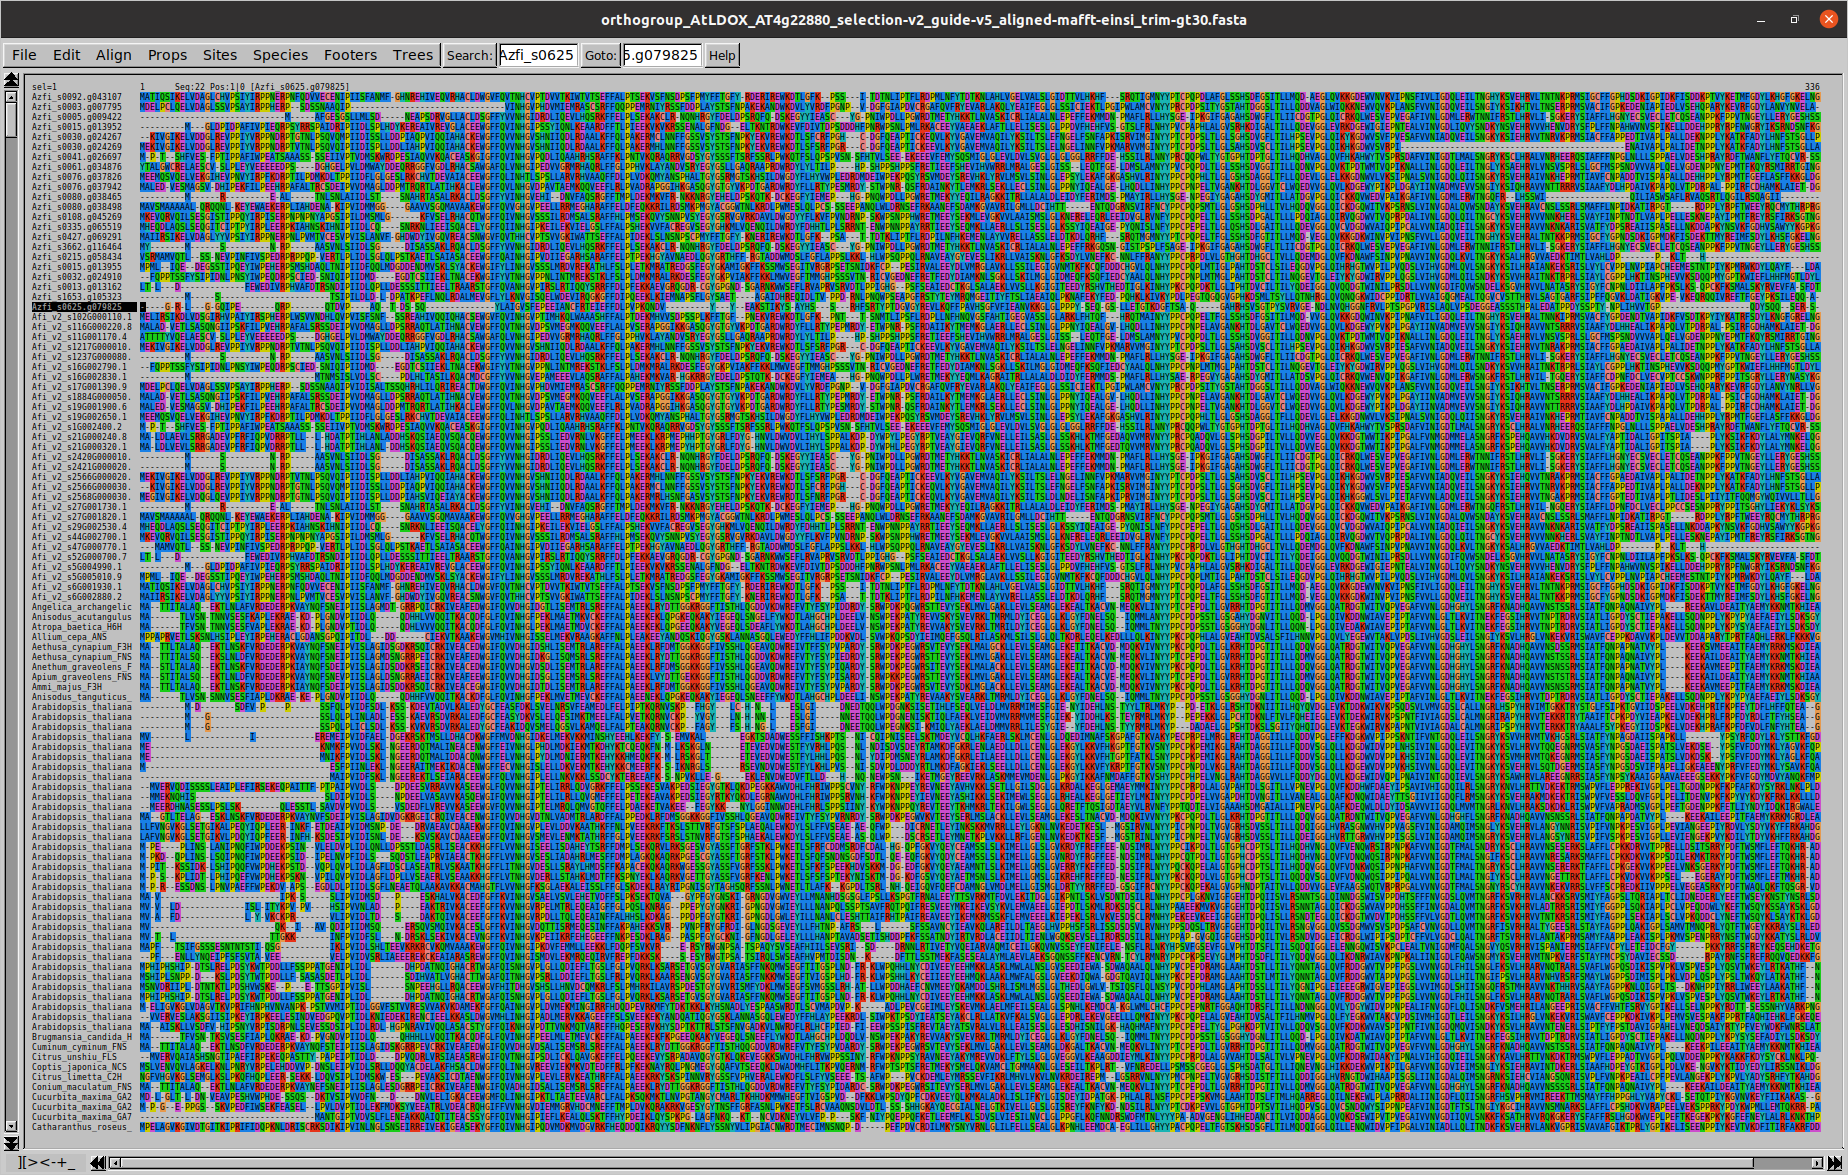

## conclusion


In the clade annotation, I followed the guide sequences provided by my exellent colleague Erbil.
Here are some notes on the tree, the annotation and interpretation.

* I renamed the ancestral clades to basal clades, H didn't like ancestral and what it implies, and I agree with this argument.
   - The basal clades are basal because these are the only two with algae represented.
   - Interestingly, these oldest 2-OGD clades are the only ones without functional annotation. Searching functions for model species sequences in these clades did not provide any insight.
* The first split of the basal clade is a Bryophyte invention, basically Giberelin oxidation in all kinds of ways.
   - While the radiation within bryophytes is substantial, radiation further down the line is limited compared to the rest of the tree, perhaps in Angiosperms the most.
   - Bryophytes have further radiated their GA oxidation genes after the split with lycophytes, indicating there is some sub-specialisation specific to bryophytes in this area.
   - Given the compact subtrees/clades with clear and consistent functional annotation, I chose to annotate these clades as a whole according to the guide sequences, leaving few gaps in between.
* The second big split isn't as clear cut functionally speaking. FNS, ANS, FLS, bot also jasmonate acid oxidation, ACO and NCS... there are a lot of subfunctions here.
   - I found annotating the FNS and FNS-likes a bit tricky. At first I pooled these all in an FNS+ clade, but I changed my mind when further inspecting the tree. Instead, I made one clade with FNS/F3H (both gymnosperm/angiosperm inventions) and their FNS/F2H ancestor like genes found mostly in mosses. Almost no fern/lycophyte sequences here. 
   - Secondly, there are two FNS/F3H like clades separately from this main clade. It's my guess that this separation is a false one, but that's just a hunch really. 
   - The JOX group is reasonably orthologous with most radiation happening in angiosperms and seemingly a single duplication in ferns. It seems as if JOX is a fern invention, but might be a lycohoyte invention because of the following two observations.:
   - AND and FLS are Gymnosperm incentions, but some ancestor of both these genes was present in ferns and lycophytes already it seems. 
   - The ACO clade  was placed outside this bigger second split of the tree in previous versions, but now finds it's way here. This makes more sense to me. I didn't further research the functions of COD,NCS and ACO and if it makes sense that these are grouped together here. It´s clear that a lot of radiation happened in flowering plants here, but very few seed-free plant sequences were picked up. I guess they have their own direction of radiation, separate from flowring plants.
* The third main split of the tree did not get a lot of attention from me since there's noting of particular interest in there for now. 
   - I observe again some lack of sampling in seed-free plants, although a substantial fern presence can be seen in the GSLOH/D4H group.
   - F6H looks to me like a horizontal gene transfer, but I should consult an expert on this. 
   
   

What this tree learns us is a bigger picture of evolution of the 2ogd super family of genes, and it learns us that in some cases we can assume orthology between seed-plant characterised genes, and fern uncharacterised genes. 
Specifically in the case of the JOX group, where we have _Azolla_ sequences of particular interest.

We also learn that in plenty of cases, we can't quite confirm orthology, or at least not one-to-one orthology but many-to-may orthology.
The metabolic pathways that we often use to interpret RNA-seq data for example, are often based on seed-plant characterised gene functions.
By doing so, we implicitly assume orthology between the fern and seedplant homologs. 
In the case of this particular superfamily of genes, this is likely not a reasonable assumption.
Still, while one-to-one orthology is not a reasonable assumption, some functional aspects would still be highly similar.
Perhaps certain functions are identical while orther functions of the same gene/protein are lost or gained. 
These pathways are powerfull in interpreting gene expression data.
When researching non-model organisms with substantial evolutionary distance from a model organism, it would be good practice to inspect evolution and orthology of a gene family before drawing conclusions.
Actually, apply that two all gene families in a pathway.

